# House Prices

When asked to describe their dream home, most buyers focus on the number of bedrooms, the size of the backyard, or perhaps a charming white-picket fence. However, real estate pricing is far more intricate, influenced by dozens of subtle yet critical factors—many of which buyers might never consider.

This dataset provides an extensive look into the complexities of home valuation. With 79 explanatory variables, it captures nearly every aspect of residential properties in Ames, Iowa—from the type of road access and basement quality to the year of construction and even proximity to railroads. 

**Goal**

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Kaggle link** : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

**File descriptions**

train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

**Data fields**
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**The Impact of Research on Real Estate Valuation**

Real estate pricing models are more than just tools for homebuyers and sellers—they drive policy decisions, investment strategies, and economic forecasts. By leveraging machine learning and data analysis, researchers and professionals can:

- Identify undervalued or overvalued properties.
- Improve real estate appraisal methods.
- Enhance urban planning and housing policies.
- Provide more accurate financial risk assessments for banks and mortgage lenders.

## Loading data

### Loading data and EDA

In [1]:
#installations
!pip install phik

In [2]:
# import standart libraries
import pandas as pd
import numpy as np

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for ML and preprocessing data
from sklearn.model_selection import  train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# import libraries for data analyses
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import ttest_ind
import phik

# Exploratory data analysis (EDA)

In [3]:
# load our train dataset as 'data'
data = pd.read_csv('./data/train.csv', index_col= 0)

In [4]:
# load our test dataset
test = pd. read_csv('./data/test.csv', index_col= 0)

In [5]:
#reset the indices in data and create a new ordinal index
data = data.reset_index()

In [6]:
#display first 5 rows
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
# remove the Id column
data = data.drop(columns=['Id'])

Let's see the preliminary information about datasets

In [8]:
# write the function for preliminary analysys
def analyze_dataset(dataset):
    for i, df in enumerate(dataset):
        #display first rows
        print(f'First rows of dataset {i}:')
        print(df.head())
        print('\n')
        #display all information about dataset
        print(f'Info o dataset {i}:')
        print(df.info())
        print('\n')
        #check for missing values
        print(f'Missing values in dataset {i}:')
        print(df.isna().sum())
        print('\n')
        #check for duplicates
        print(f'Duplicate rows in dataset {i}:')
        print(df.duplicated().sum())
        print('/n')
#loaded dataset
dataset = [data]
#run the function for analysis
analyze_dataset(dataset)

First rows of dataset 0:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD

The dataset consists of a table with 1,460 records and 80 columns (features). Among them, 37 columns have numerical data types (int64, float), while the remaining 42 columns have string data types (object). The data types of the columns correspond to the information they contain. Several columns contain missing values that need to be either filled or removed: 'LotFrontage' (259 missing values), 'Alley' (1,369), 'MasVnrType' (872), 'BsmtQual' (37), 'BsmtCond' (37), 'BsmtExposure' (38), 'BsmtFinType1' (37), 'BsmtFinType2' (38), 'Electrical' (1), 'FireplaceQu' (690), 'GarageType' (81), 'GarageYrBlt' (81), 'GarageFinish' (81), 'GarageQual' (81), 'GarageCond' (81), 'PoolQC' (1,453), 'Fence' (1,179), and 'MiscFeature' (1,406).

Let's see on test dataset

In [9]:
#loaded dataset
dataset = [test]
#run the function for analysis
analyze_dataset(dataset)

First rows of dataset 0:
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0 

The dataset consists of a table with 1,460 records and 80 columns (features). Among them, 37 columns have numerical data types (int64, float), while the remaining 42 columns have string data types (object). The data types of the columns correspond to the information they contain. Several columns contain missing values that need to be either filled or removed: 'MSZoning' (4 missing values), 'LotFrontage' (227), 'Alley' (1,352), 'Utilities' (2), 'Exterior1st' (1), 'Exterior2nd' (1), 'MasVnrType' (894), 'MasVnrArea' (15), 'BsmtQual' (44), 'BsmtCond' (45), 'BsmtExposure' (44), 'BsmtFinType1' (42), 'BsmtFinSF1' (1), 'BsmtFinType2' (42), 'BsmtFinSF2' (1), 'BsmtUnfSF' (1), 'TotalBsmtSF' (1), 'BsmtFullBath' (2), 'BsmtHalfBath' (2), 'KitchenQual' (1), 'Functional' (2), 'FireplaceQu' (730), 'GarageType' (76), 'GarageYrBlt' (78), 'GarageFinish' (78), 'GarageCars' (1), 'GarageArea' (1), 'GarageQual' (78), 'GarageCond' (78), 'PoolQC' (1,456), 'Fence' (1,169), 'MiscFeature' (1,408), and 'SaleType' (1). No duplicate records were found.

In [10]:
# Creation of histograms
fig, axes = plt.subplots(figsize=(15, 20))
ax = data.hist(ax=axes)

# Increasing spacing between plots
plt.subplots_adjust(hspace=0.5, wspace=0.5, left=0.1, right=0.9)  # wspace increases horizontal spacing

# Adding axis labels
for row in ax:
    for subplot in row:
        subplot.set_xlabel("Value")
        subplot.set_ylabel("Frequency")

# Adding a main title
plt.suptitle("Histograms of Dataset Features", fontsize=16)

plt.show()

C:\Users\m.novoselova\AppData\Local\Temp\ipykernel_22532\1039450569.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax = data.hist(ax=axes)


These histograms show the distribution of various features in the dataset. Many variables, such as LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, GarageArea, and SalePrice, exhibit right-skewed distributions, indicating the presence of outliers or high variance values. This suggests that log transformation may be necessary before modeling. Some features, like OverallQual, OverallCond, Fireplaces, KitchenAbvGr, and GarageCars, have a limited number of unique values, making them more categorical in nature and suitable for One-Hot Encoding. Year-based features (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold) show an increasing trend in new houses over time, which aligns with real estate market dynamics, while YrSold does not display strong seasonal trends. Features such as FullBath, HalfBath, and TotRmsAbvGrd show distinct modal values (e.g., most houses have two full bathrooms), suggesting a standard housing layout. The target variable SalePrice also has a long right tail, which could negatively impact linear models, making log transformation advisable. Overall, the dataset requires preprocessing, including correlation analysis, outlier handling, and feature engineering, to enhance model performance.

#### Unique values of categorical features 

In [11]:
# display unique values for each object type column in the dataset
def check_unique_values(df):
    object_columns = df.select_dtypes(include='object').columns
    for col in object_columns:
        unique_values = df[col].unique()
        print(f'Column {col} has {len(unique_values)} unique values:')
        print(unique_values)
        print('-' * 50)

check_unique_values(data)

Column MSZoning has 5 unique values:
['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
Column Street has 2 unique values:
['Pave' 'Grvl']
--------------------------------------------------
Column Alley has 3 unique values:
[nan 'Grvl' 'Pave']
--------------------------------------------------
Column LotShape has 4 unique values:
['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
Column LandContour has 4 unique values:
['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
Column Utilities has 2 unique values:
['AllPub' 'NoSeWa']
--------------------------------------------------
Column LotConfig has 5 unique values:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
Column LandSlope has 3 unique values:
['Gtl' 'Mod' 'Sev']
--------------------------------------------------
Column Neighborhood has 25 unique values:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 

This output provides insights into the categorical features of the dataset by displaying the number of unique values and their distributions. Some columns, such as Street, Utilities, CentralAir, and PavedDrive, have only two unique values, making them good candidates for label encoding.  Features like MSZoning, Neighborhood, Condition1, BldgType, and RoofMatl have multiple unique values and do not have an inherent order. These are ideal for one-hot encoding. Features like ExterQual, ExterCond, BsmtQual, HeatingQC, KitchenQual, and FireplaceQu represent quality ratings (e.g., Poor, Fair, Good, Excellent). These should be mapped to numerical values to preserve their order. Some columns contain a significant number of missing values (nan), such as Alley, MasVnrType, BsmtQual, FireplaceQu, PoolQC, and Fence. These may require imputation or special treatment (e.g., adding a "None" category).
Neighborhood (25 unique values) and Exterior1st/Exterior2nd (15-16 unique values) contain many unique categories. Depending on their impact on the target variable, they might need feature engineering (e.g., grouping similar categories) to avoid high-dimensional one-hot encoding.

In [12]:
#check the missing values
pd.set_option('display.max_rows', None)
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

The dataset contains missing values in several features. The highest number of missing values is observed in PoolQC (1453), MiscFeature (1406), Alley (1369), Fence (1179), and FireplaceQu (690). These features may have many missing values due to the nature of the data (e.g., the absence of a pool or fence). There are also missing values in MasVnrType (872), GarageType (81), BsmtQual (37), and other features related to the basement and garage. These missing values should be handled before using the data for modeling, either by imputing the most likely values or removing them, depending on the context of the task.

### Visualization and analysis of quantitative and categorical features.

In [13]:
# display basic statistical summary for dataset
pd.set_option('display.max_columns', None)
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

The average lot size is 10516 square feet, with a range from 1300 to 215245 square feet, indicating a variety of lot sizes. The average year of construction is 1971, and the average year of remodeling is 1984, suggesting that most properties have a long history of use. The overall quality score averages 6.1, and the overall condition score averages 5.6, indicating that most properties in the sample are of average quality and condition. The average living area is 1515 square feet, which is typical for residential properties. The average basement area is 1057 square feet, and the average garage area is 473 square feet, providing substantial storage and vehicle space. The average number of bathrooms is 1.57, bedrooms average 2.87, and the number of rooms on the second floor averages 6.5, which can be useful for assessing family needs and the functionality of the property. Sale prices range from 34900 to 755000, with an average price of 180921, which helps assess the property values in this dataset. Additional features such as pools, decks, and porches are less common, with an average wood deck area of 94 square feet and pool area averaging 43.5 square feet. 

In [14]:
# Write function for building histograms for each quantitative feature
# First, let's specify the quantitative features
quantitative_columns = data.select_dtypes(['int64', 'float64']).columns.tolist()

In [15]:
# Define the number of rows and columns for the subplots
num_features = len(quantitative_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(14, num_features * 5))

# Plot the graphs
for i, column in enumerate(quantitative_columns):
    # Plot the histogram with KDE
    sns.histplot(data[column], bins=30, kde=True, color='royalblue', ax=axes[i, 0], stat='density', linewidth=2)
    axes[i, 0].set_title(f'Distribution of {column}', fontsize=16)
    axes[i, 0].set_xlabel(f'{column} (Value)', fontsize=12)
    axes[i, 0].set_ylabel('Density', fontsize=12)
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Plot the boxplot
    sns.boxplot(x=data[column], ax=axes[i, 1], color='darkorange')
    axes[i, 1].set_title(f'Boxplot of {column}', fontsize=16)
    axes[i, 1].set_xlabel(f'{column} (Value)', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Write function for building a histogram for each categorical feature
# Specify categorical and discrete values
categorical_disc_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
 'OverallQual', 'OverallCond', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'
]

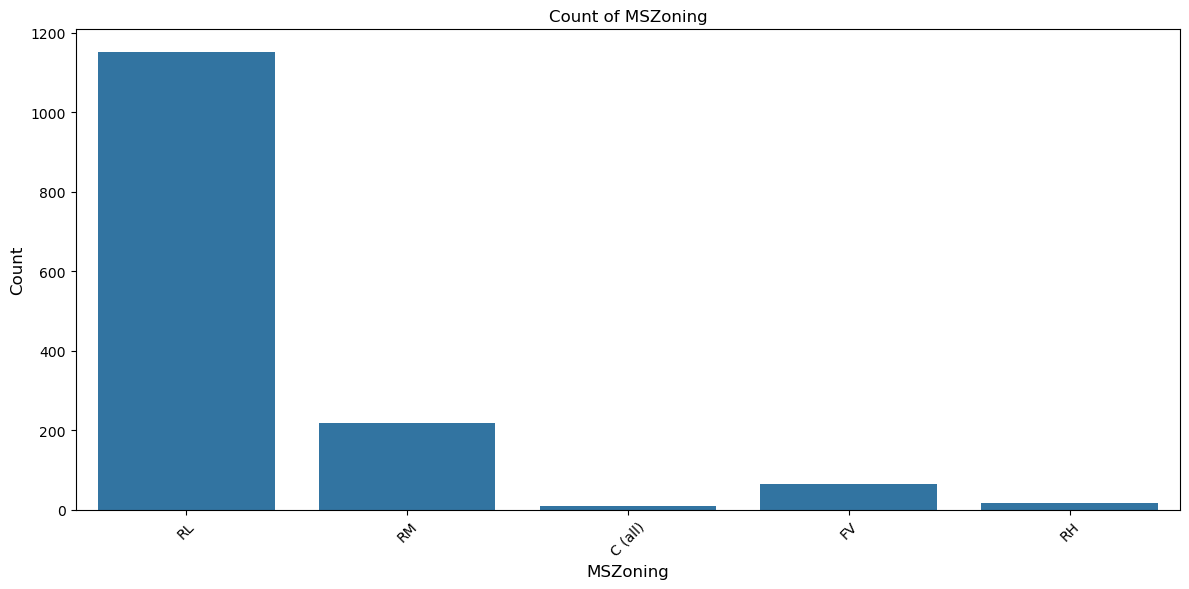

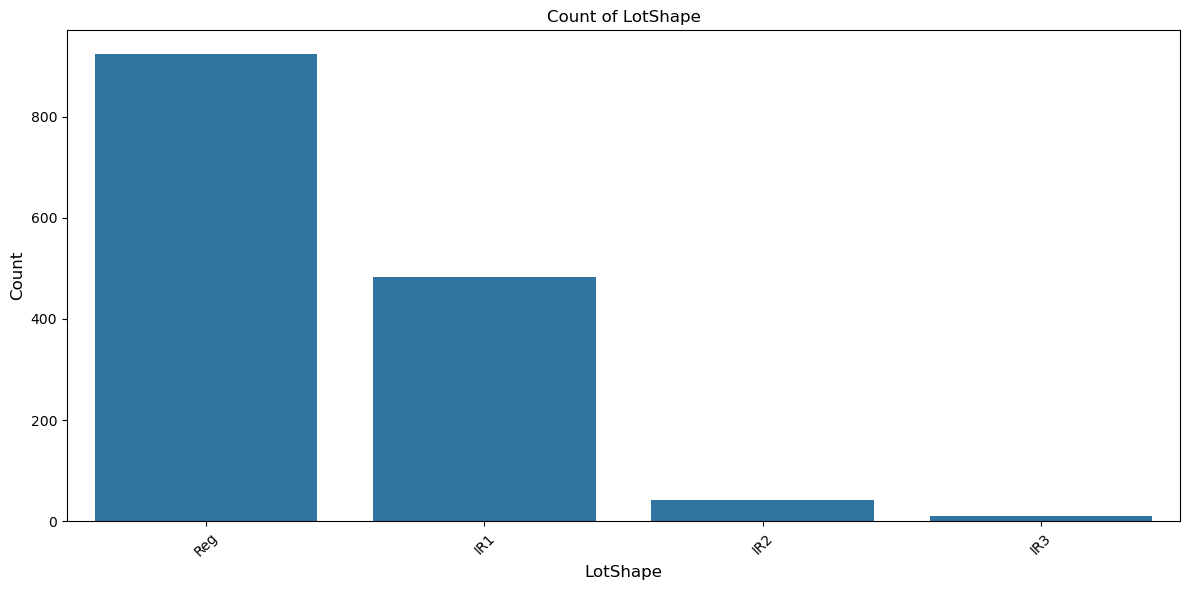

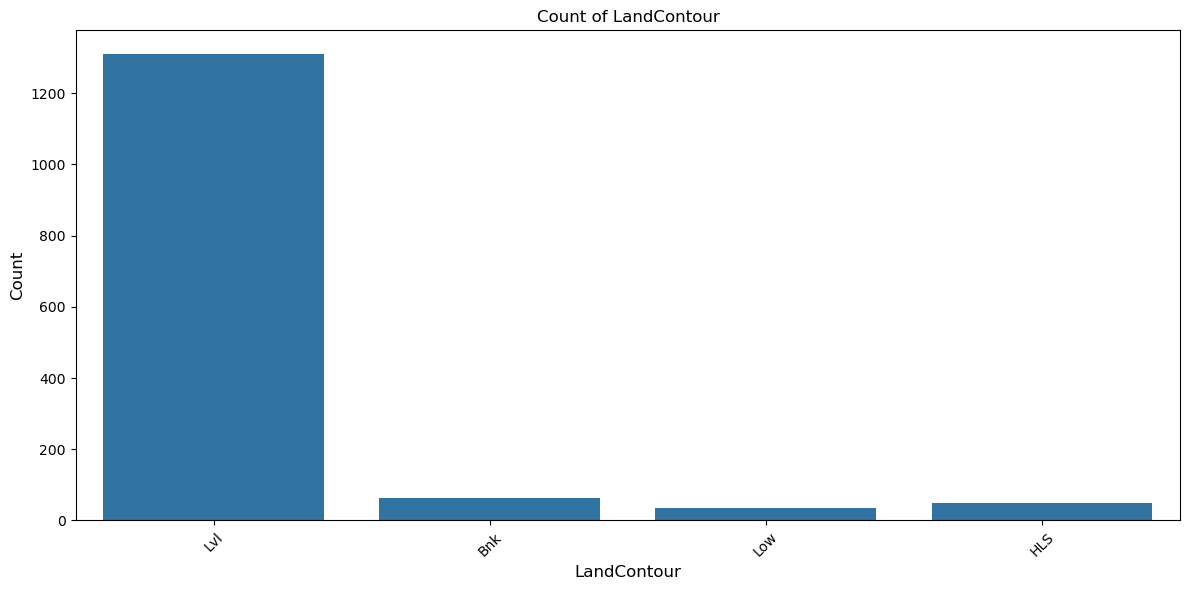

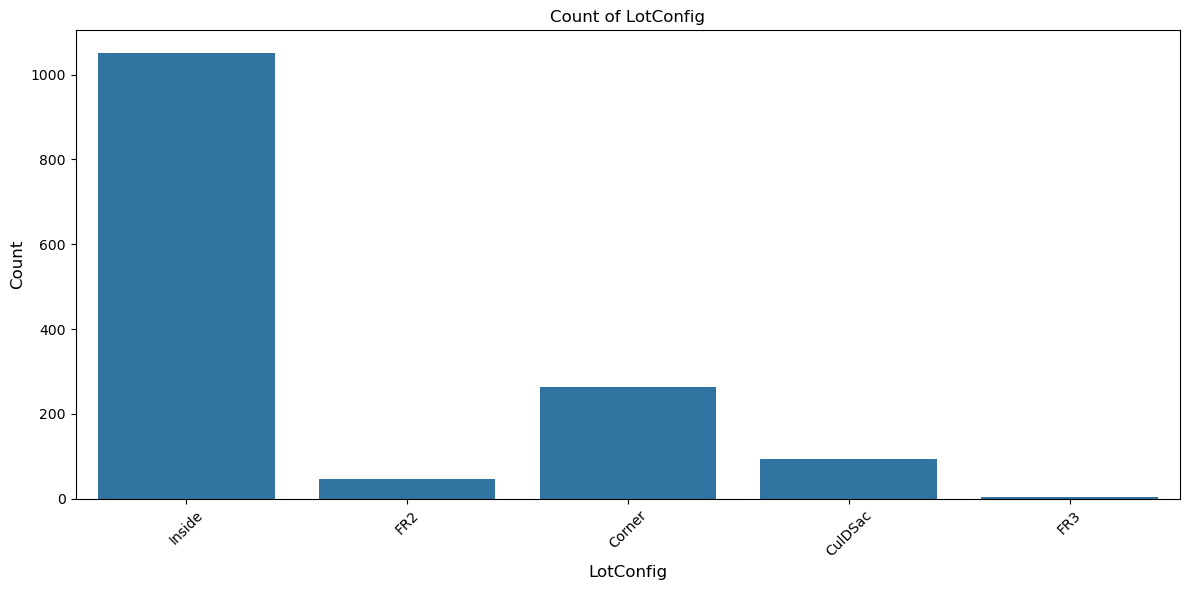

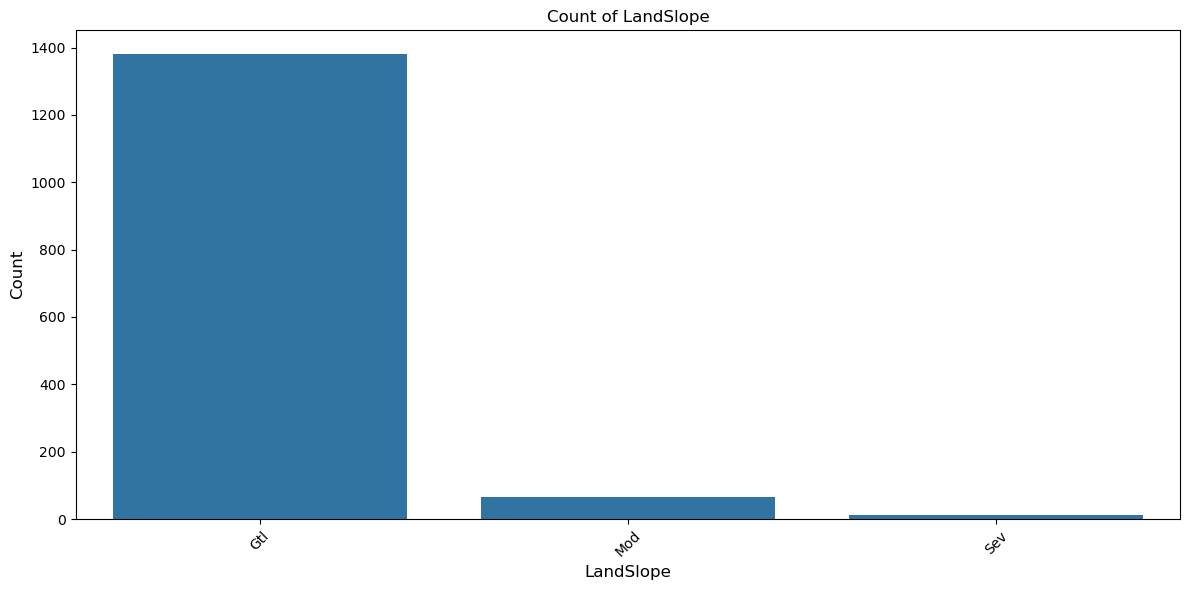

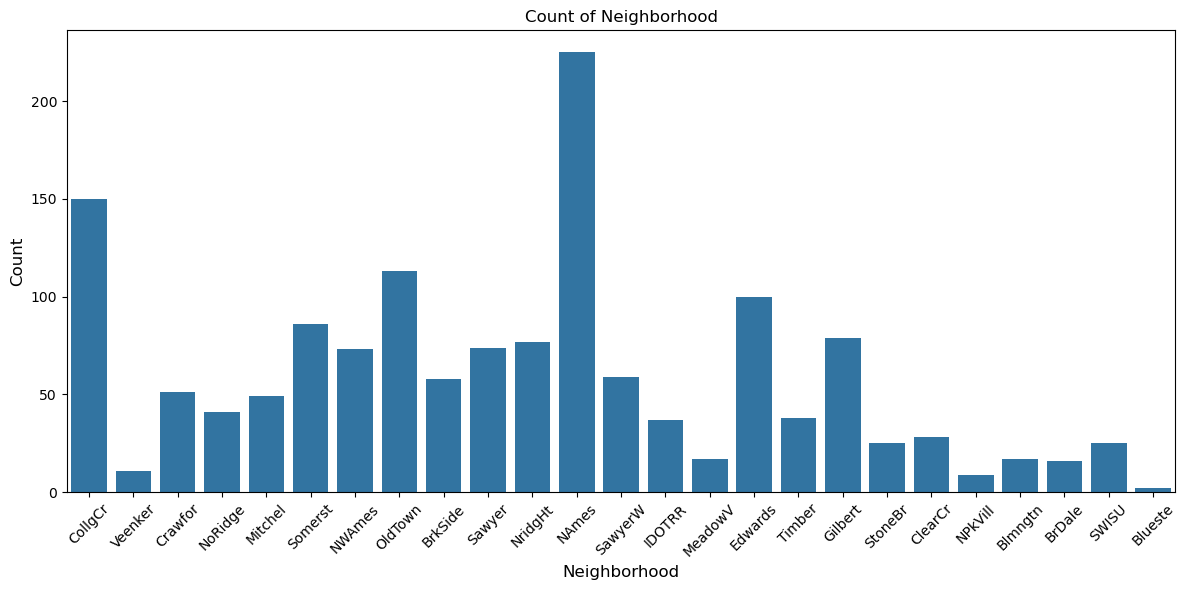

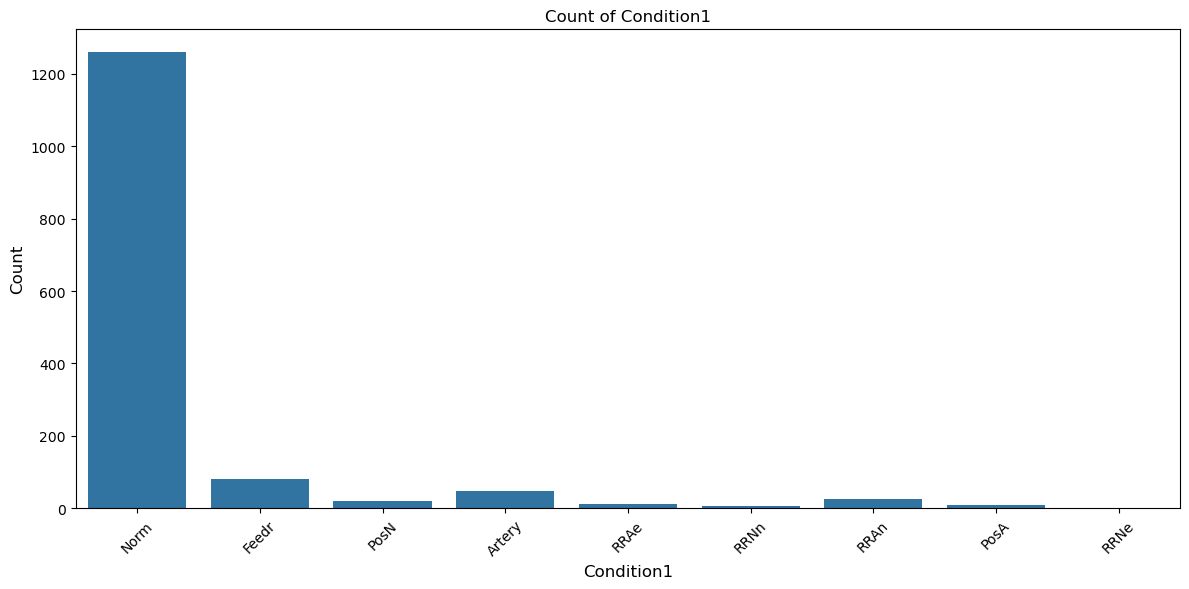

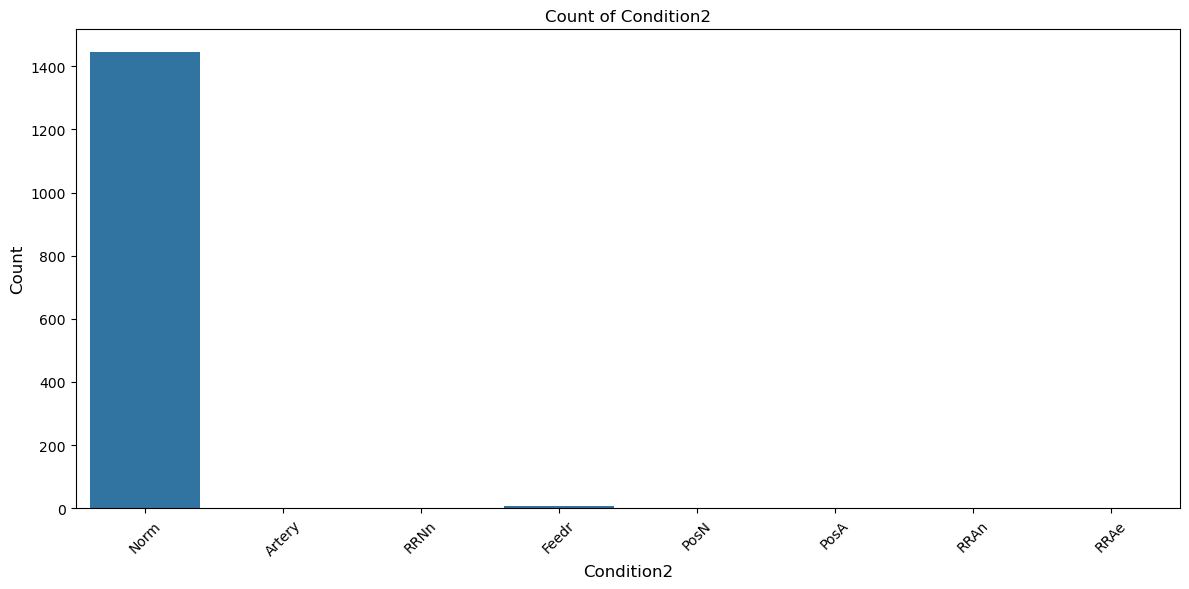

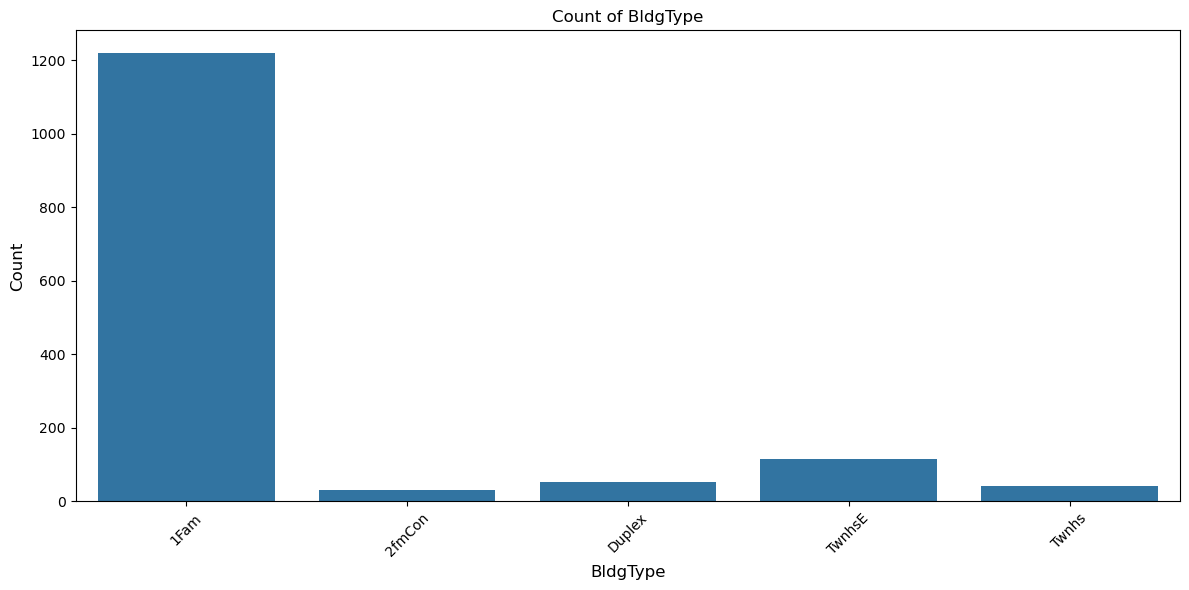

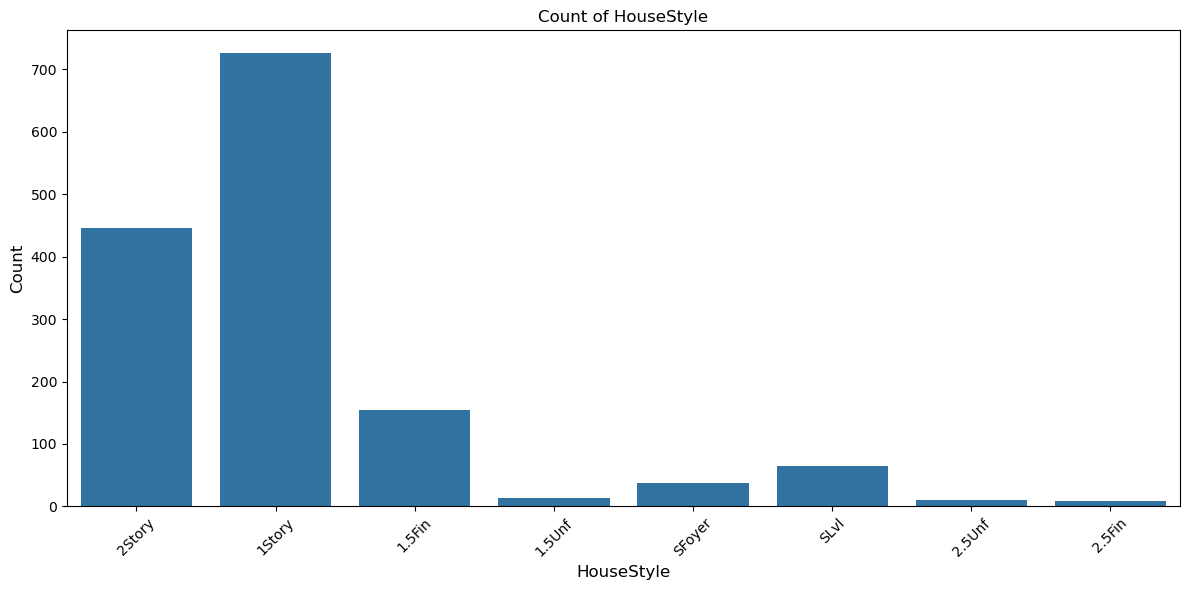

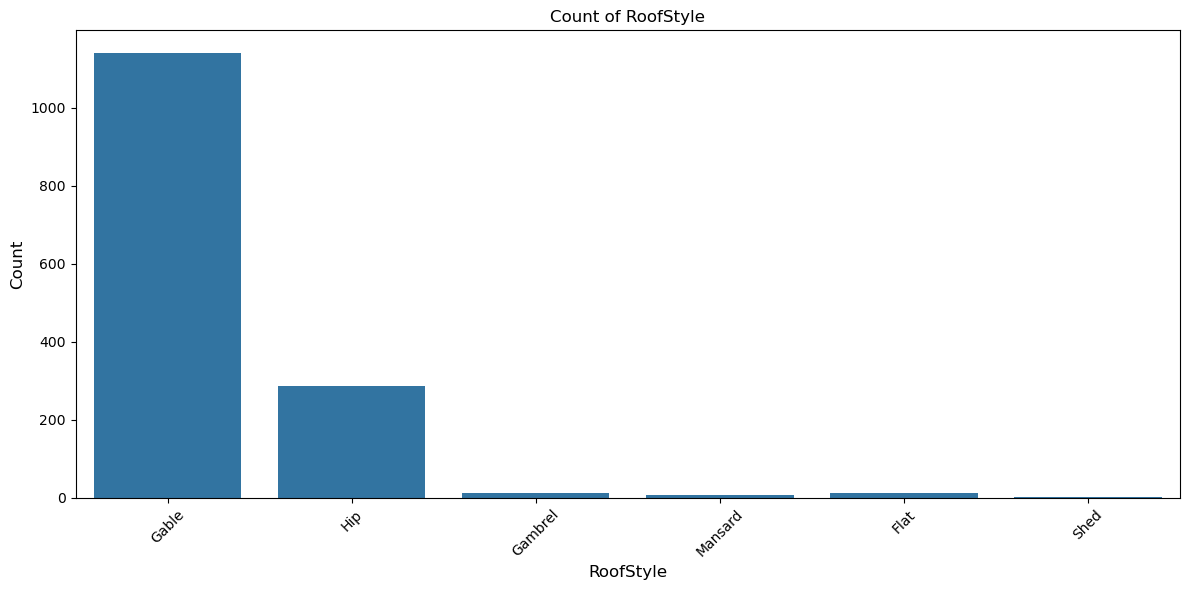

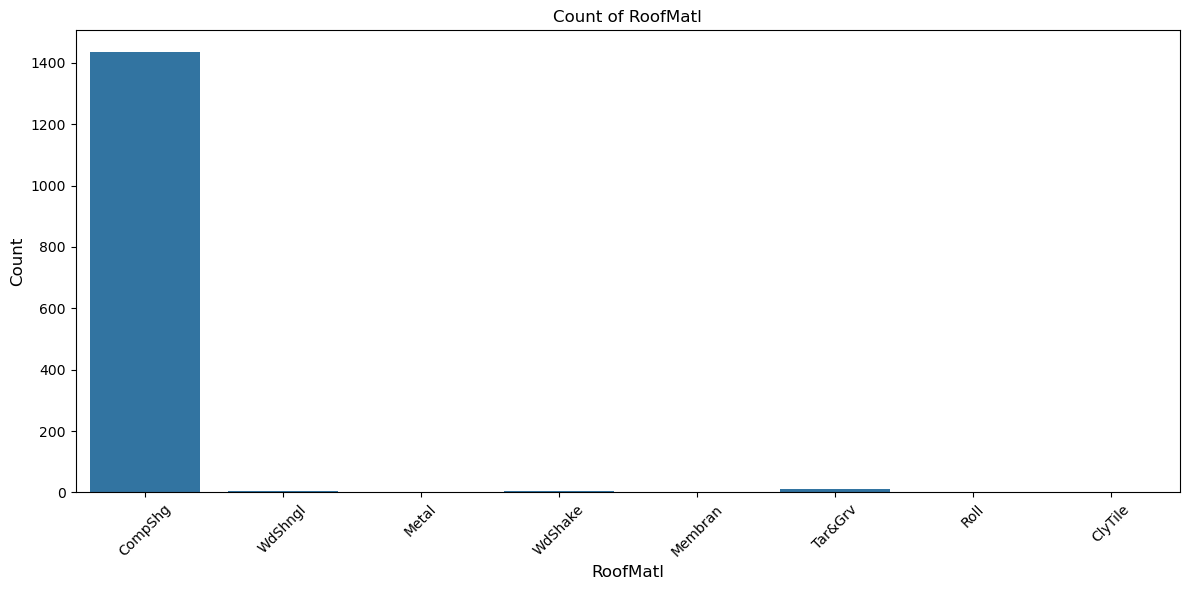

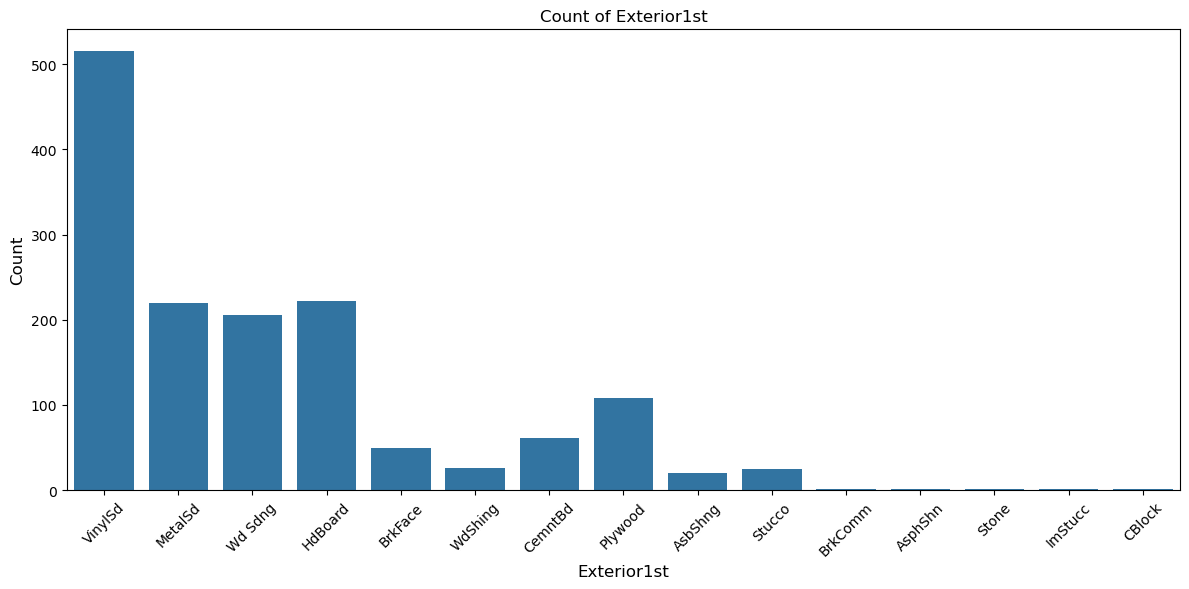

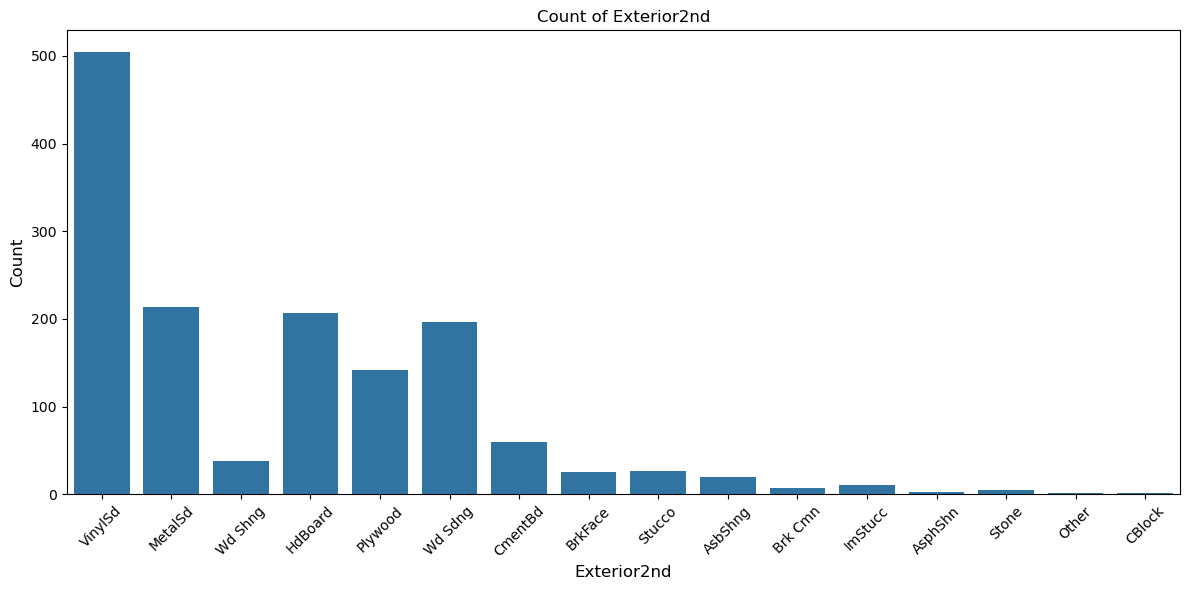

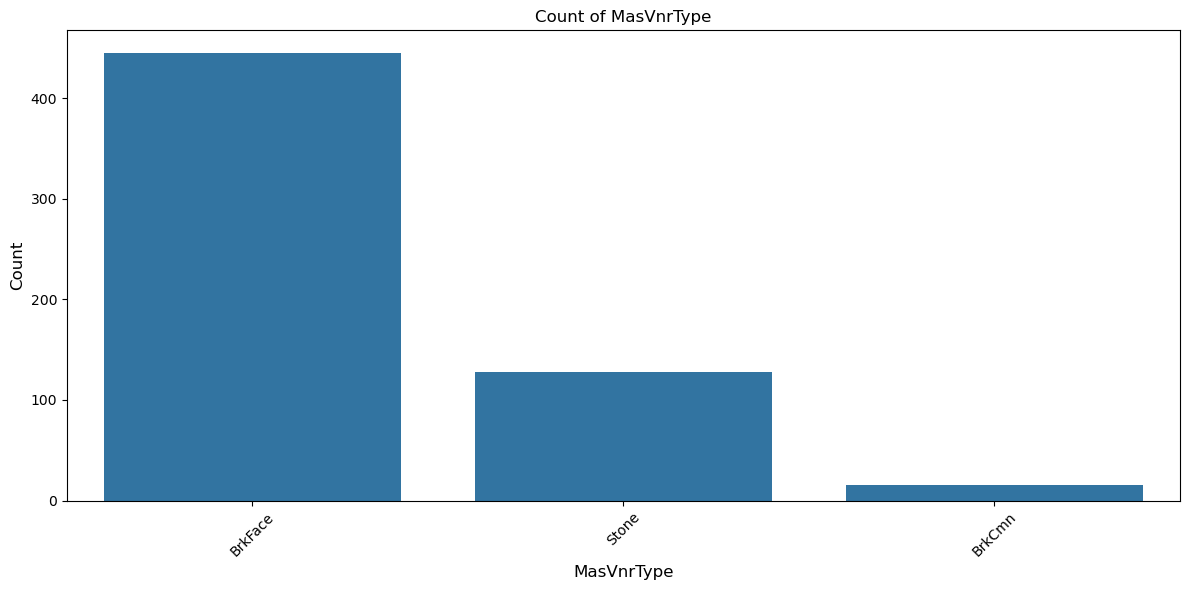

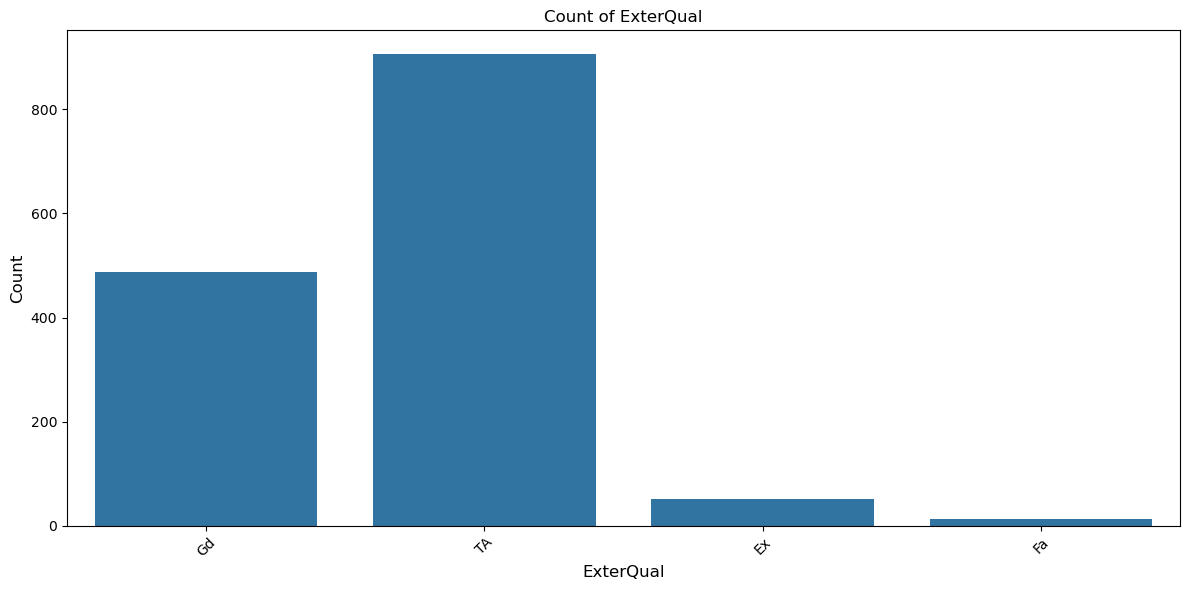

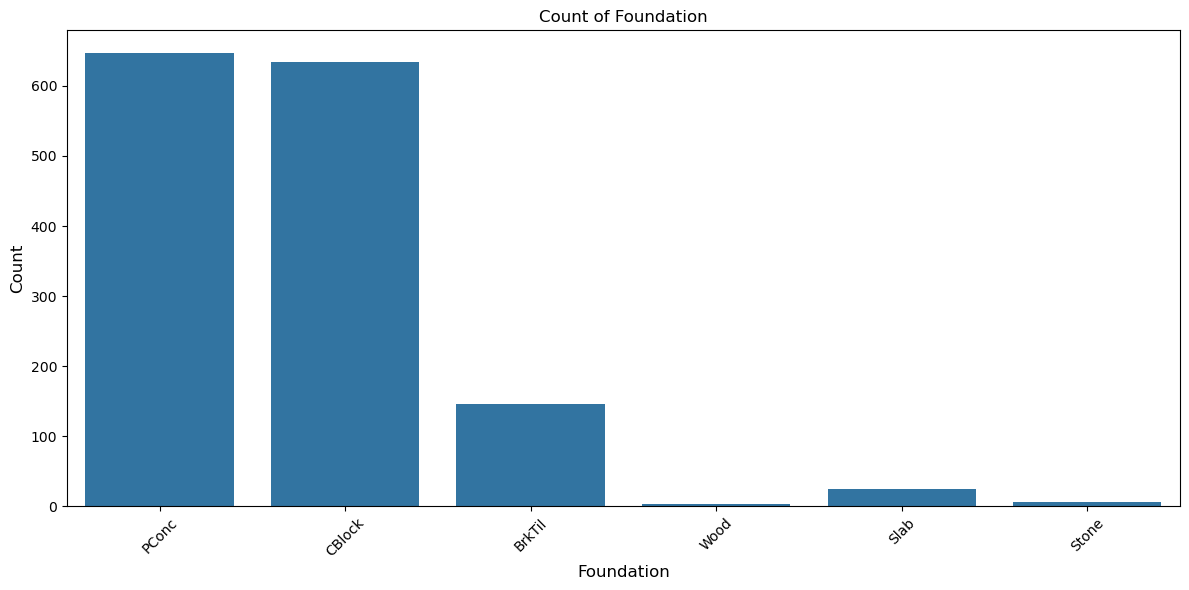

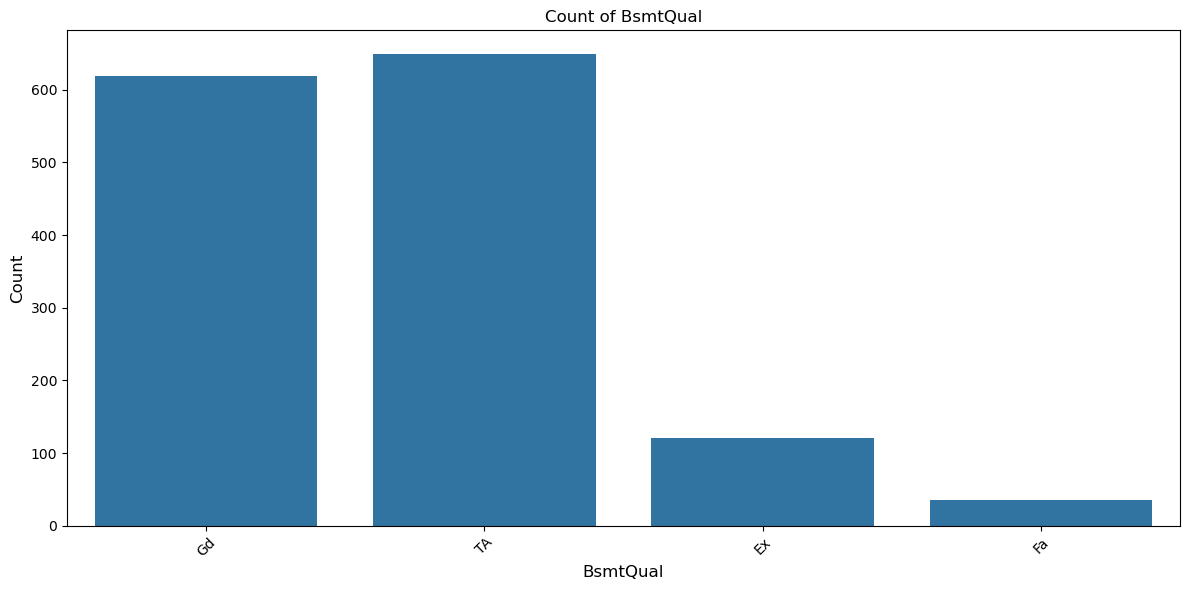

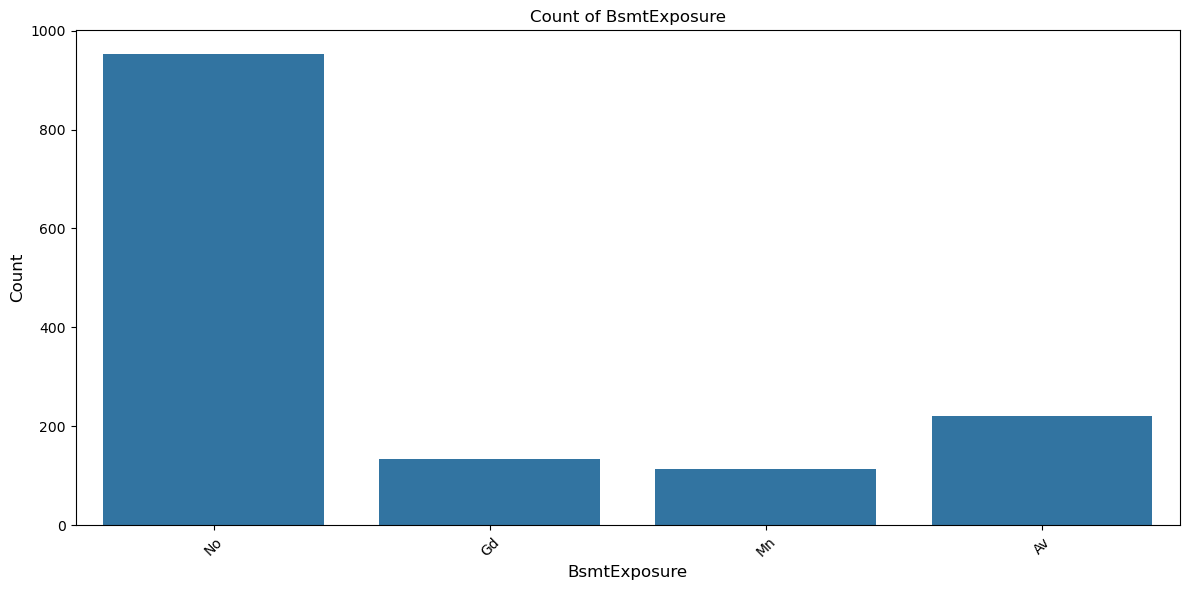

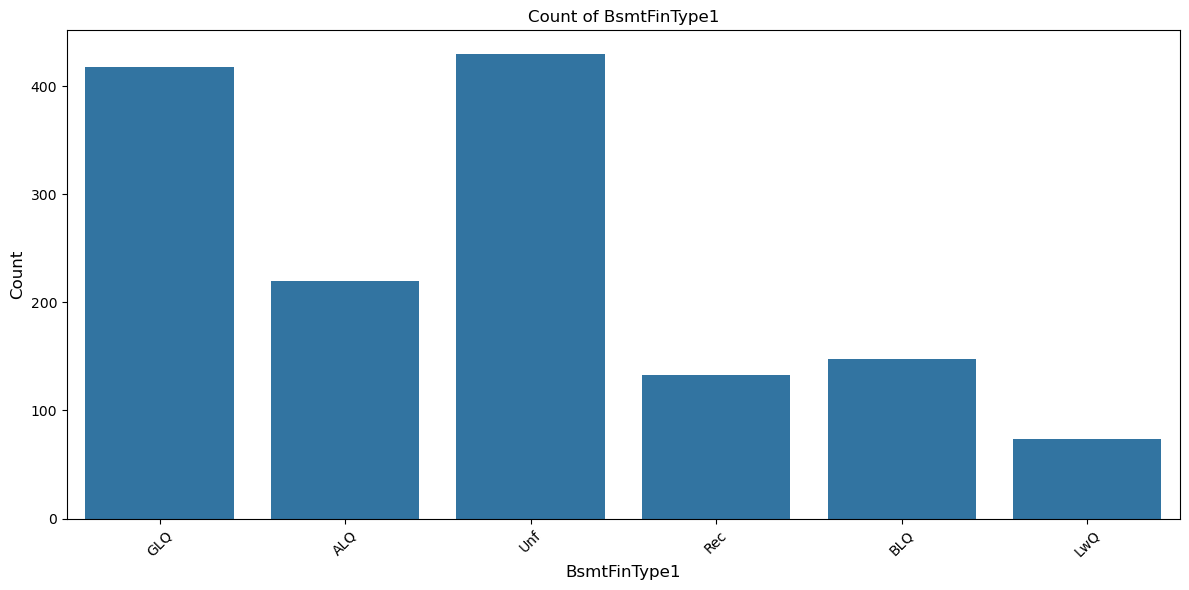

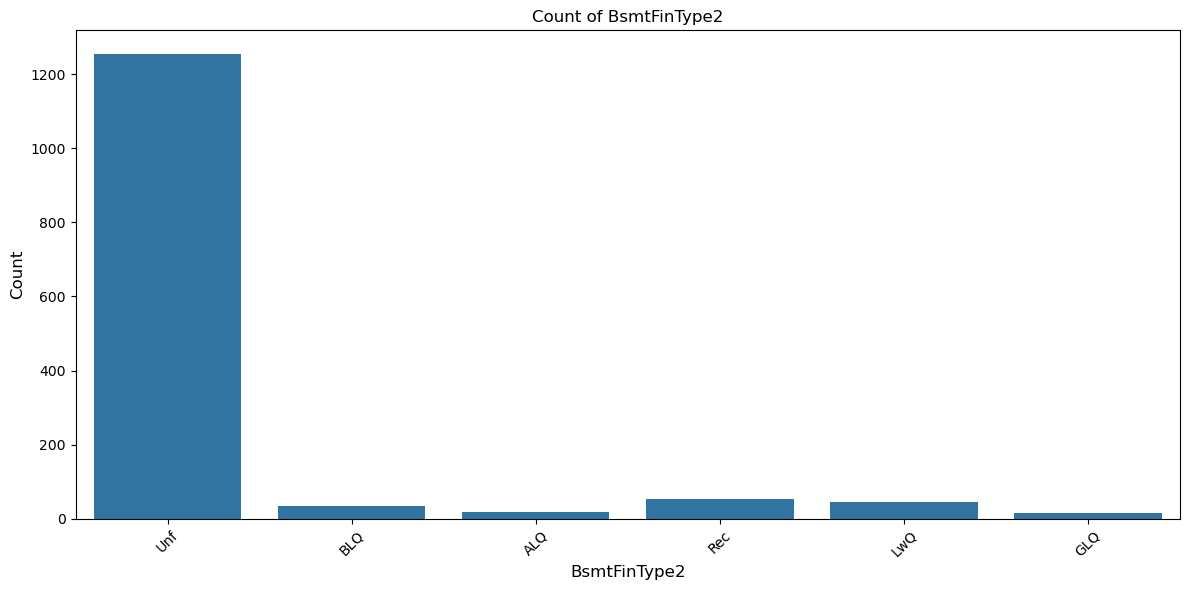

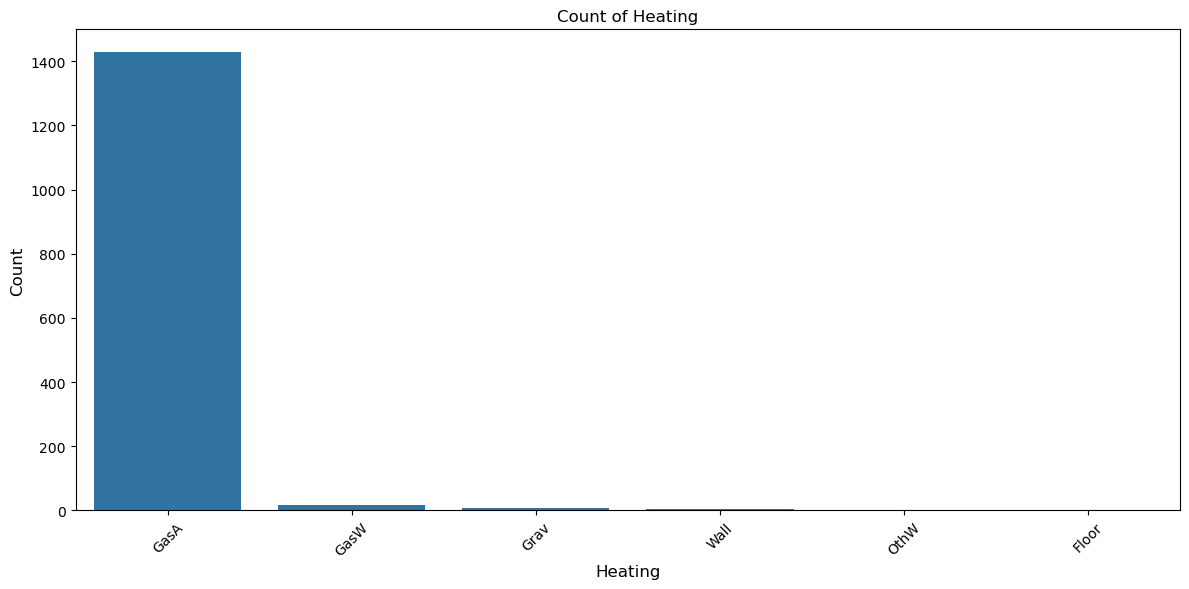

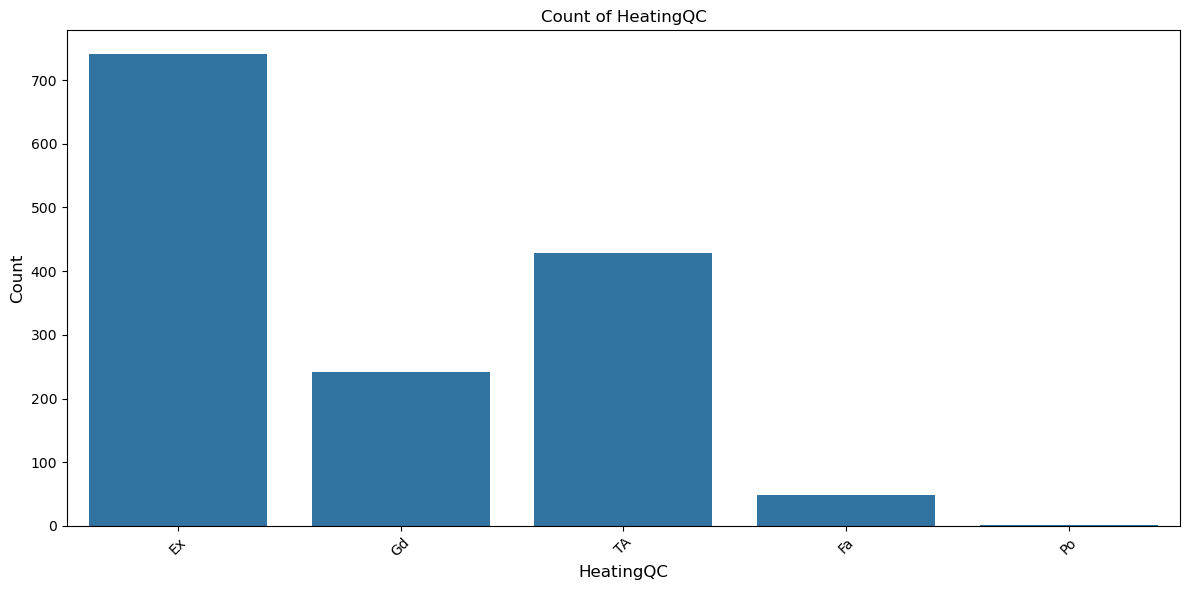

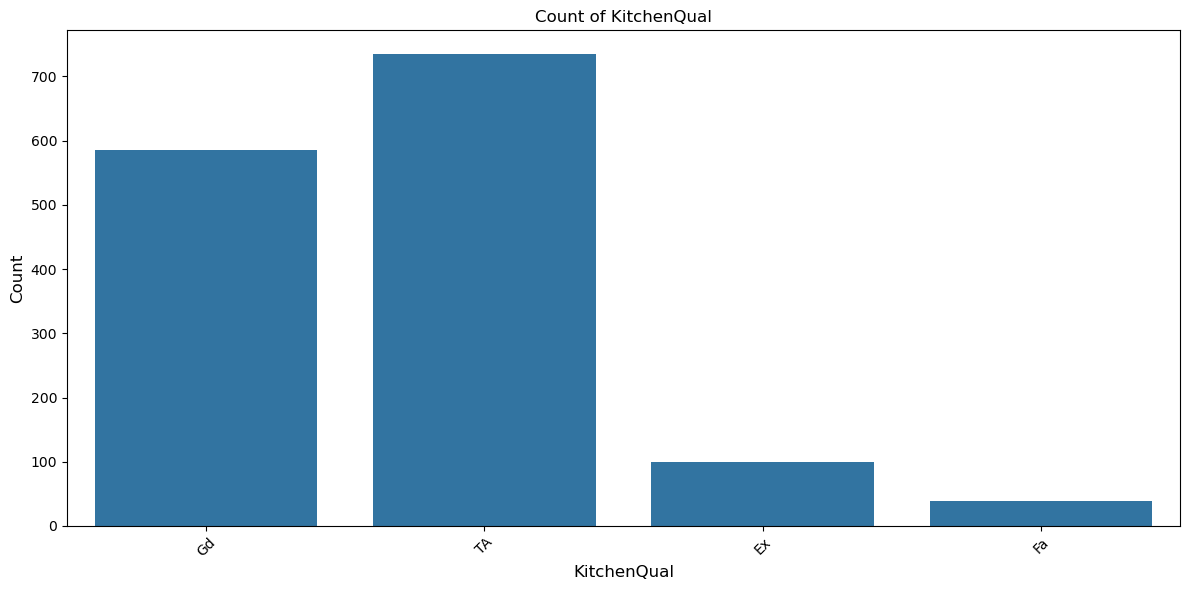

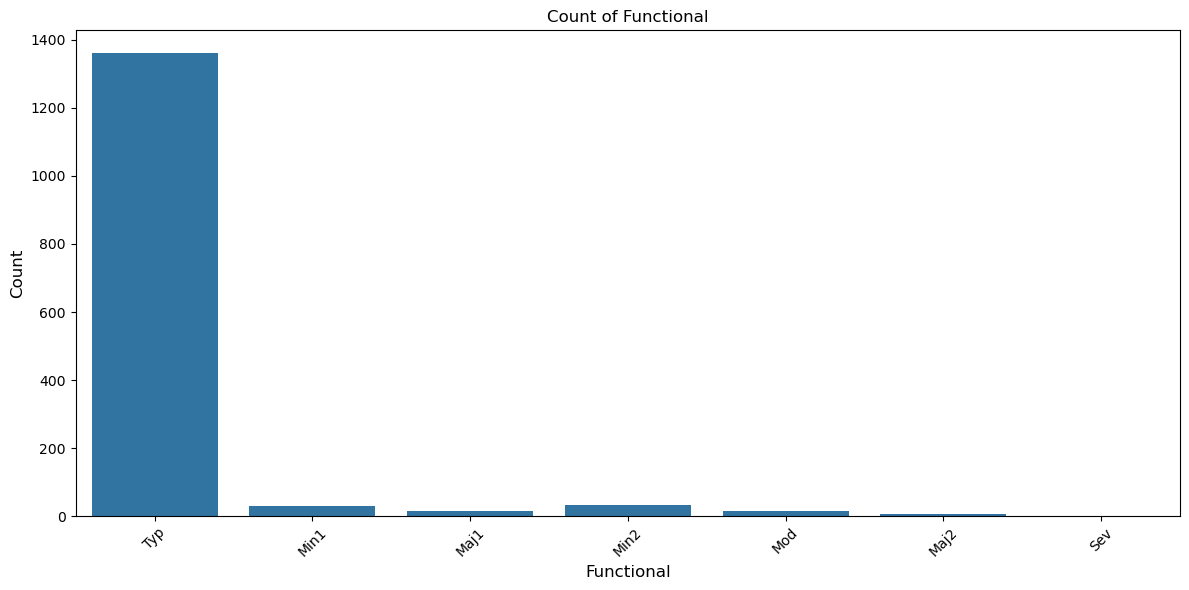

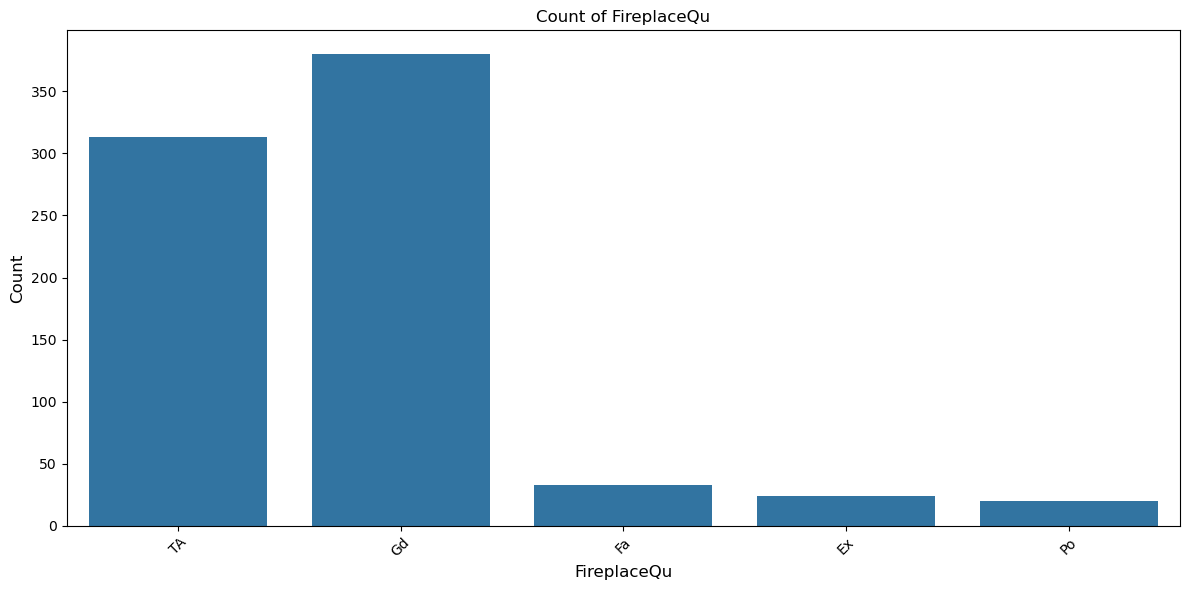

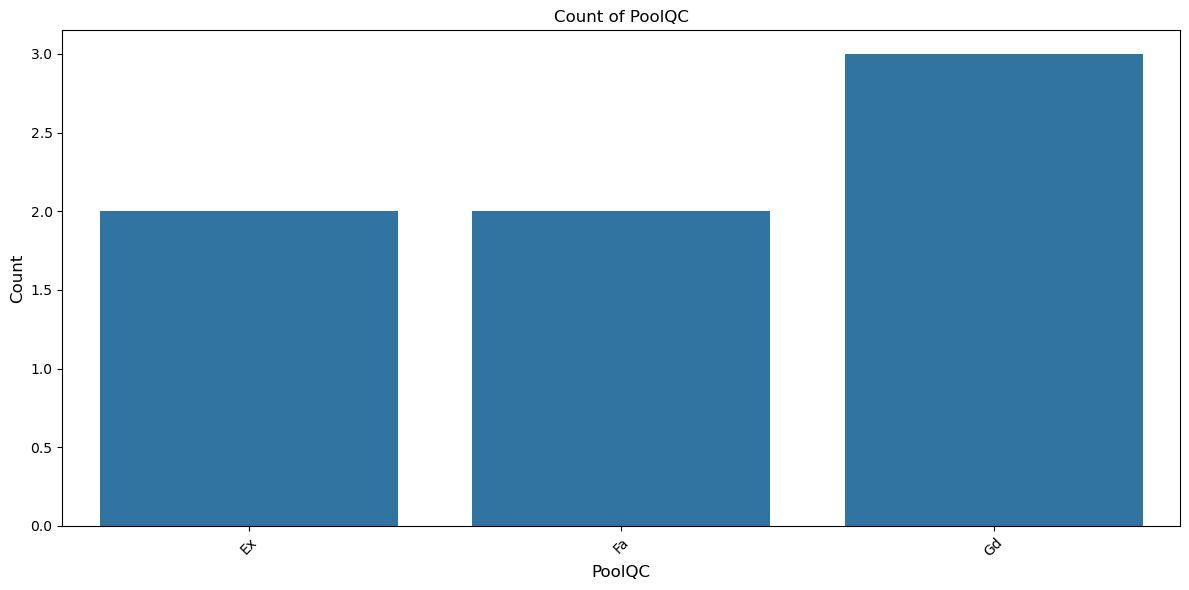

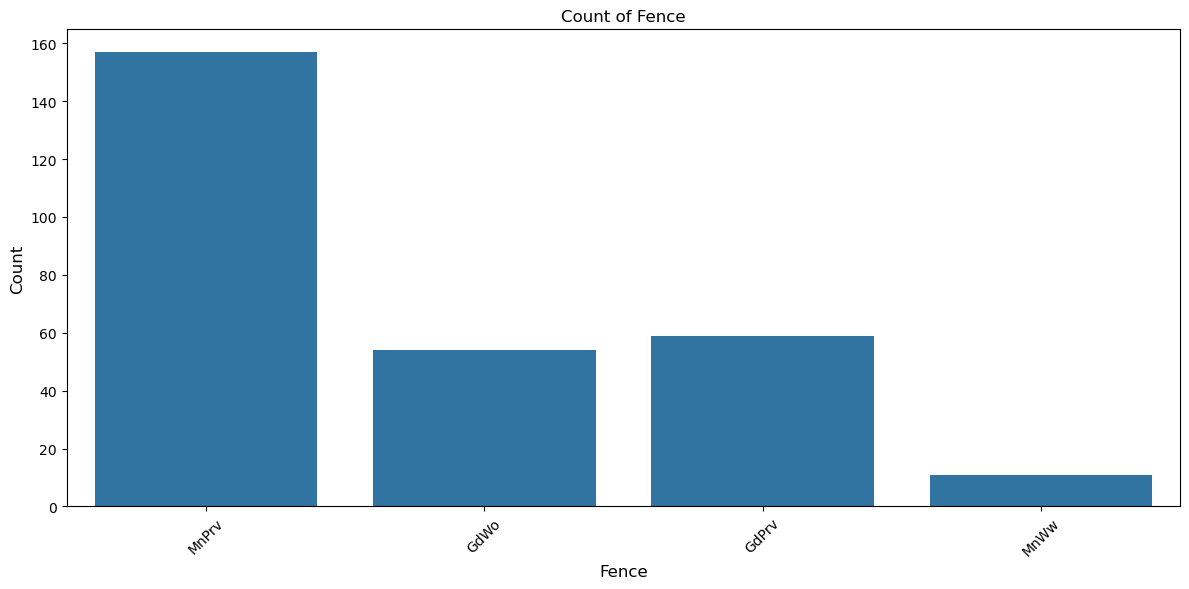

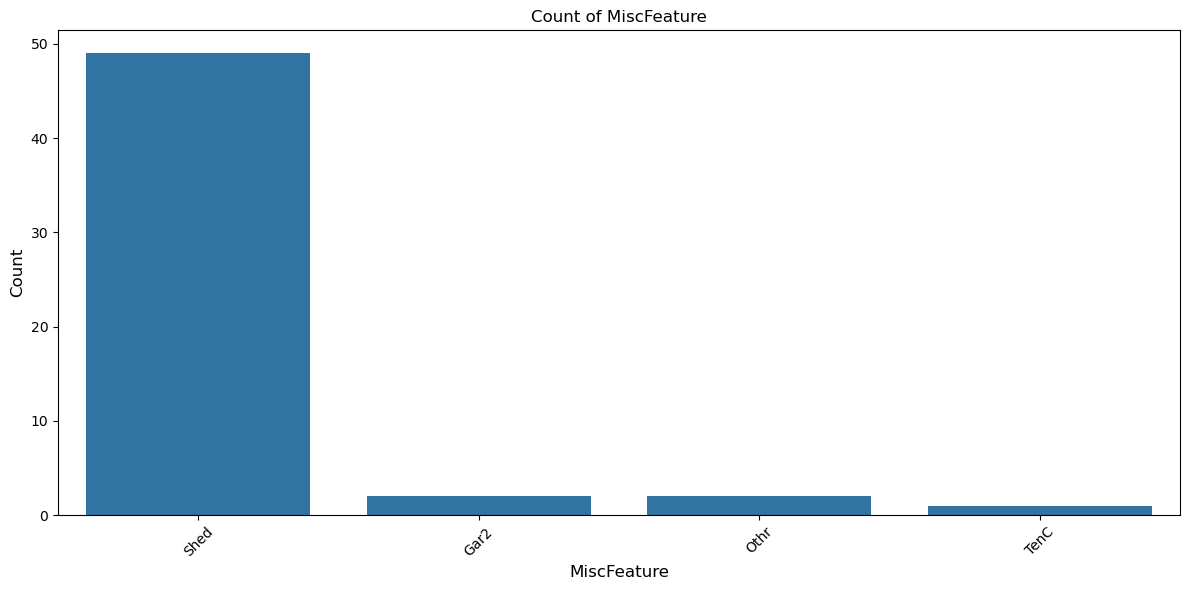

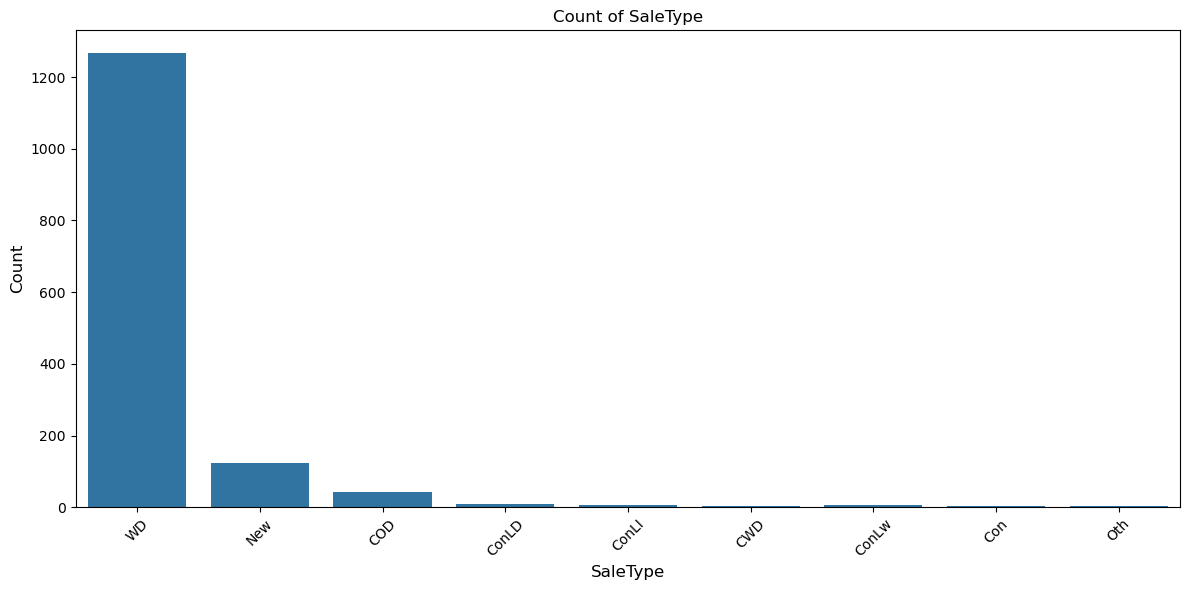

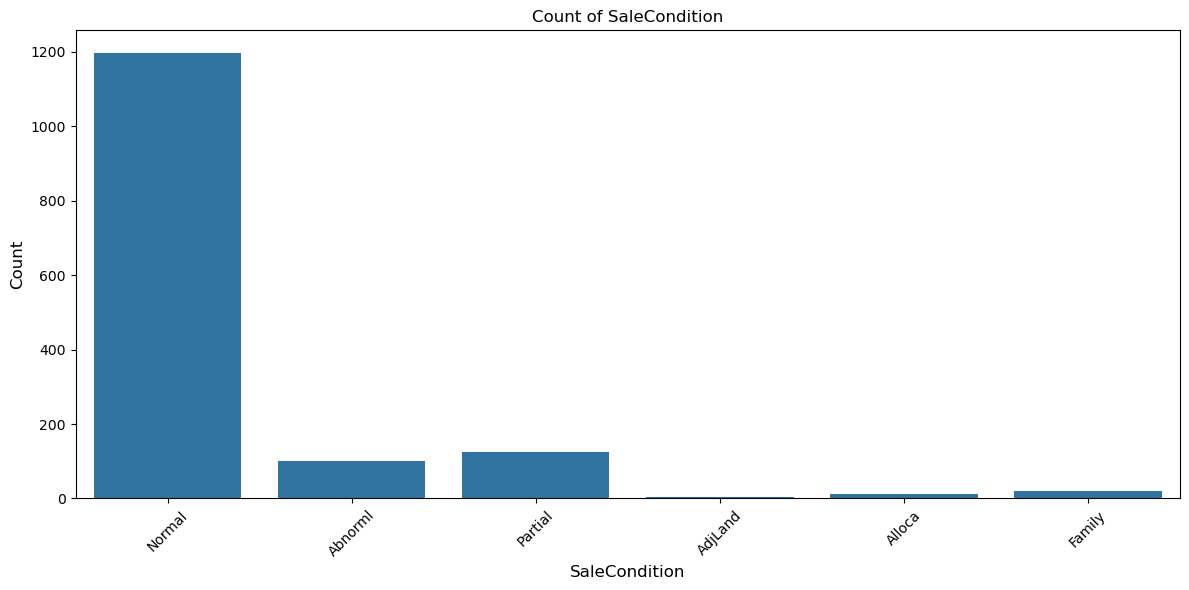

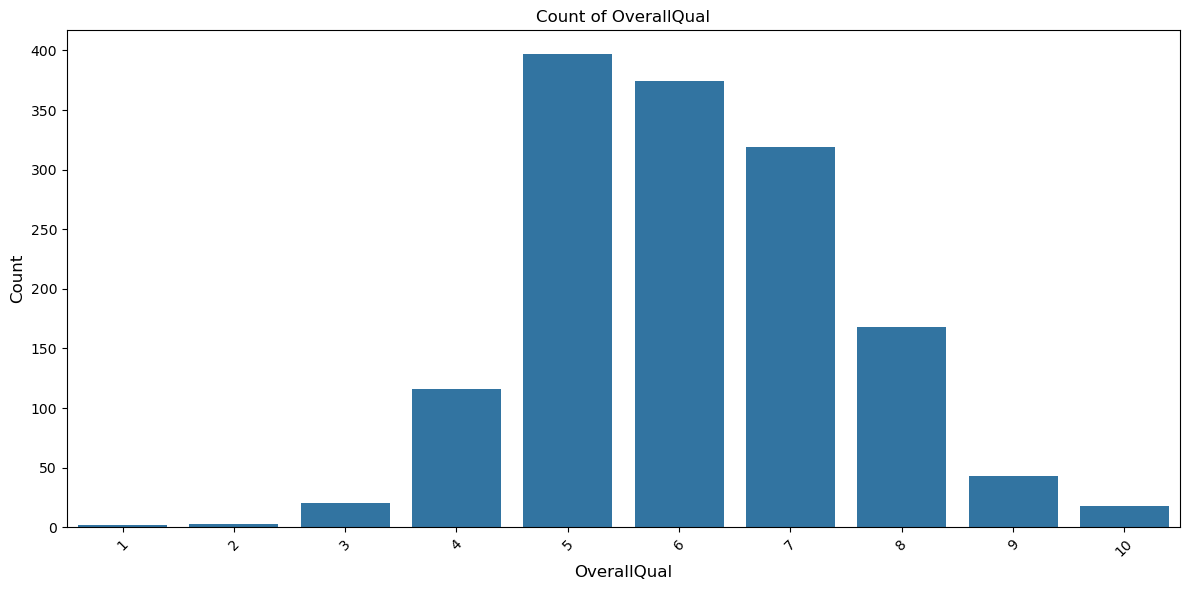

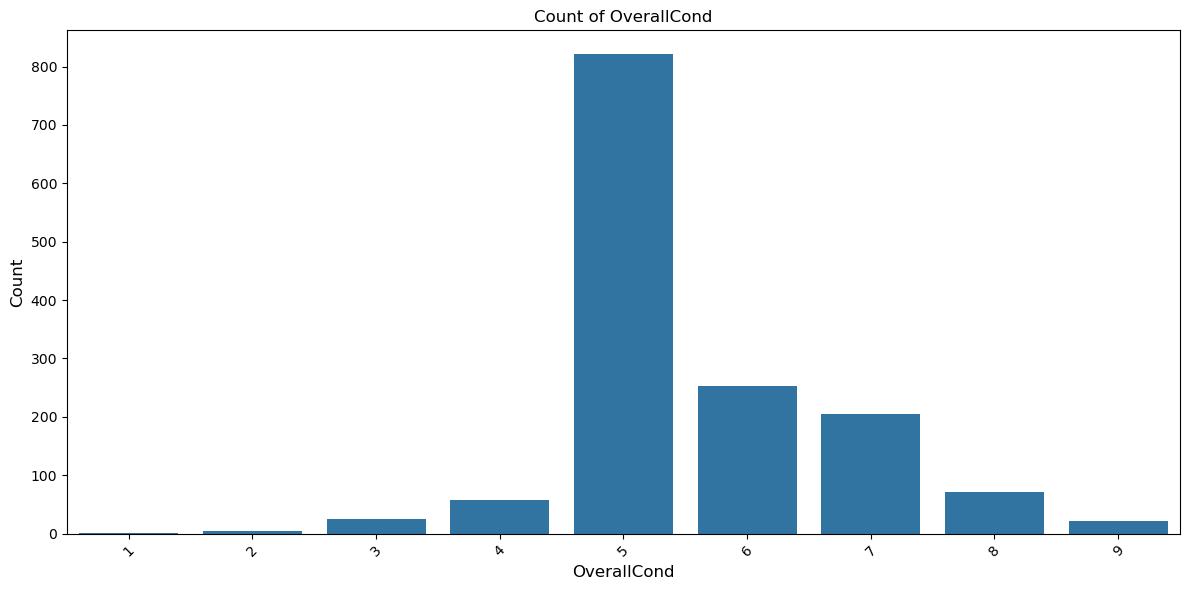

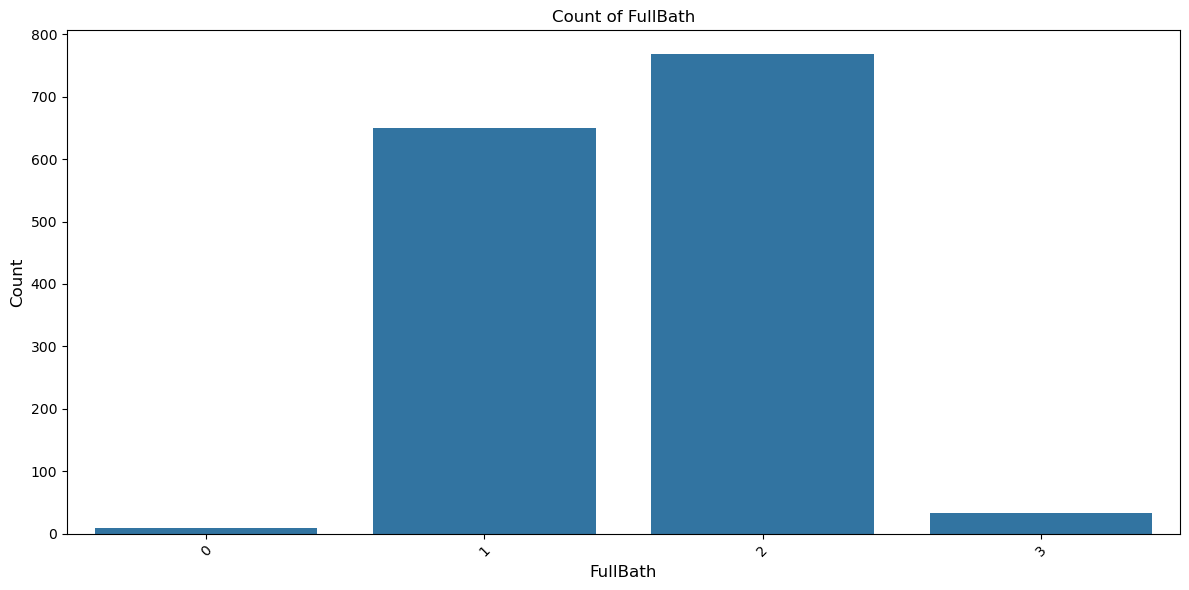

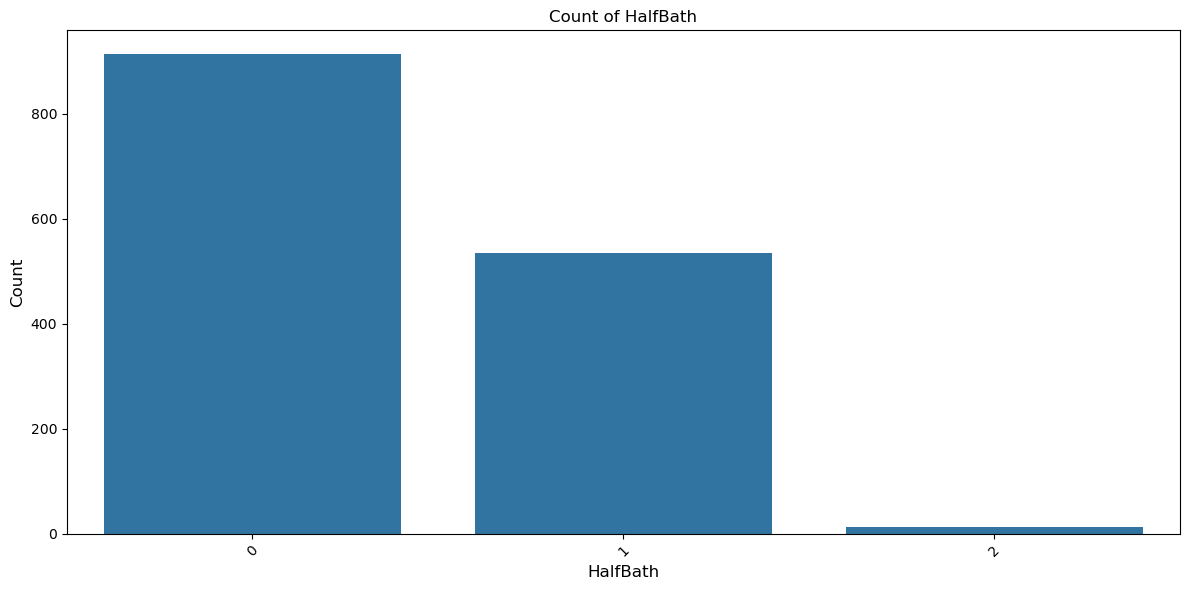

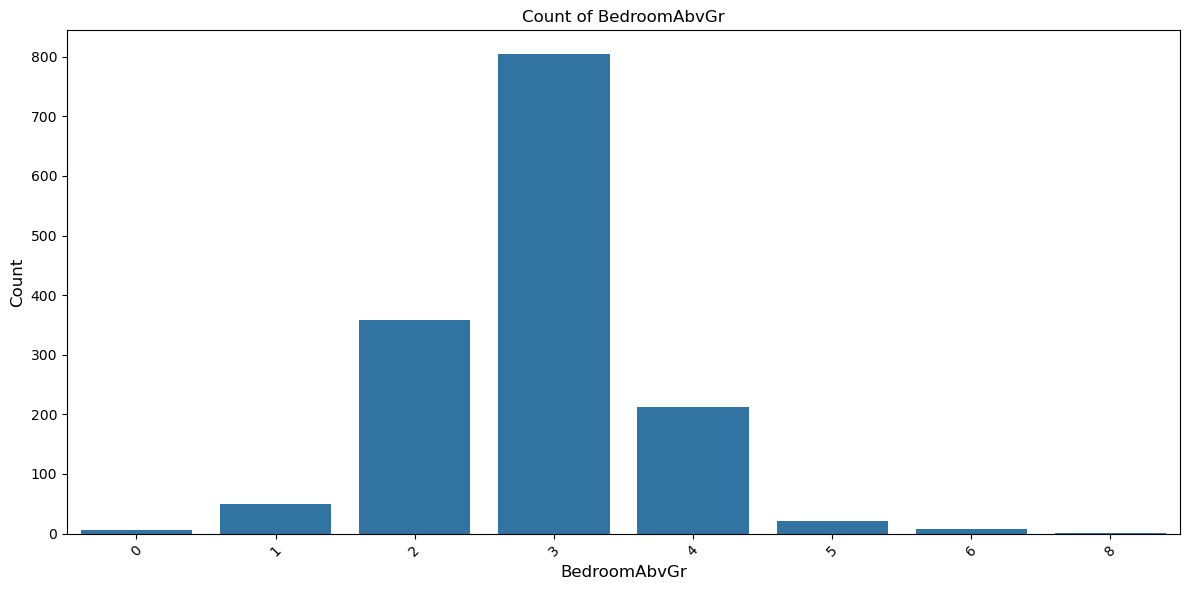

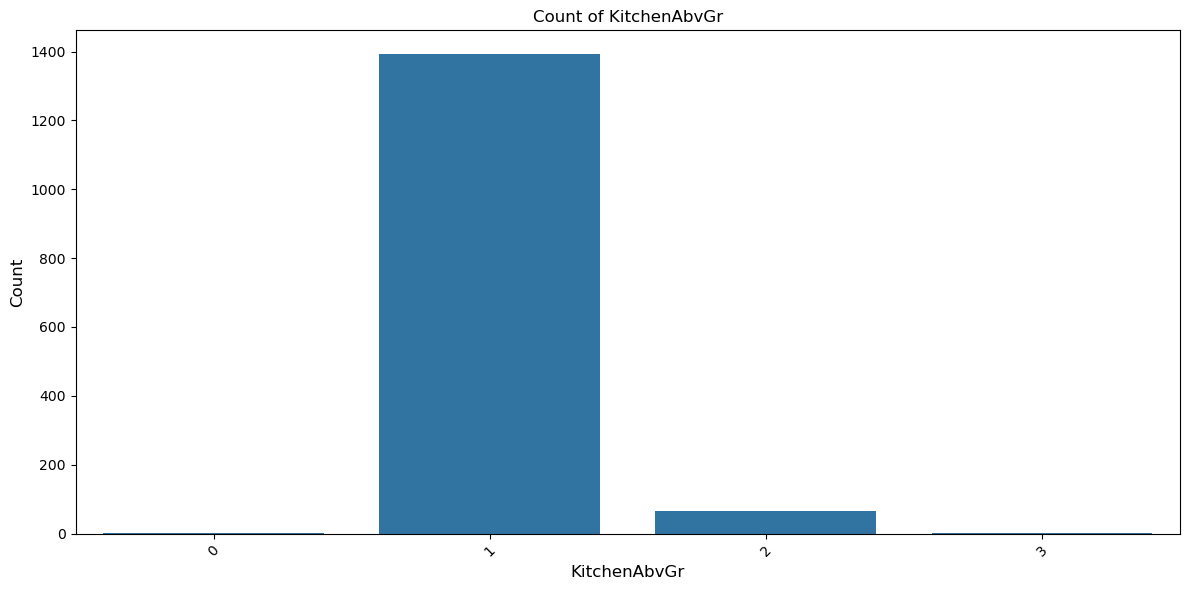

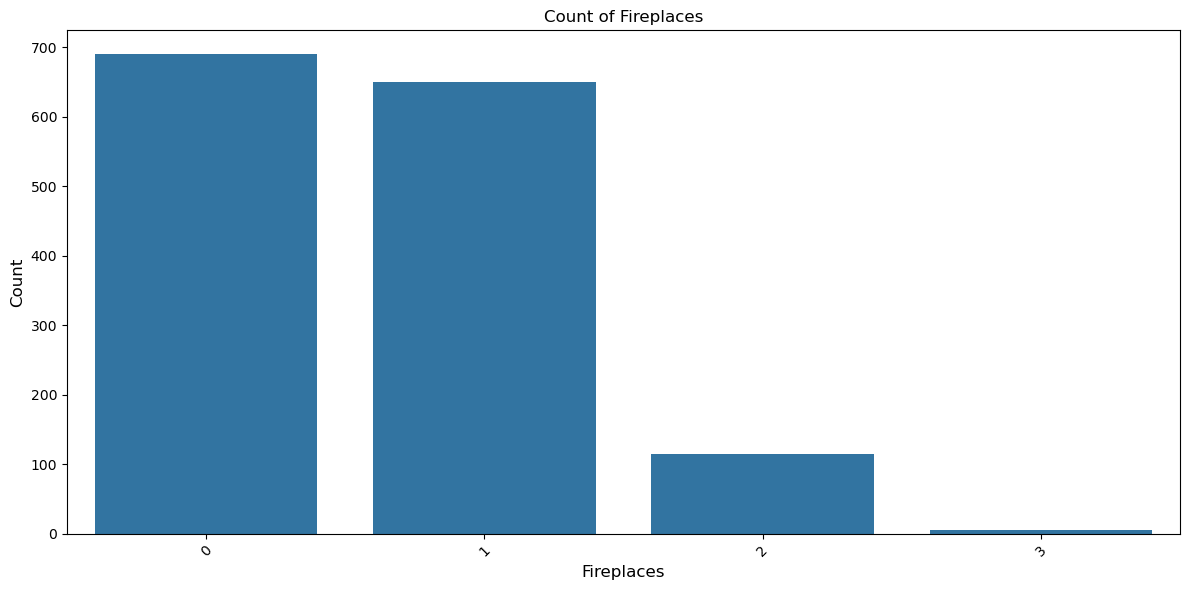

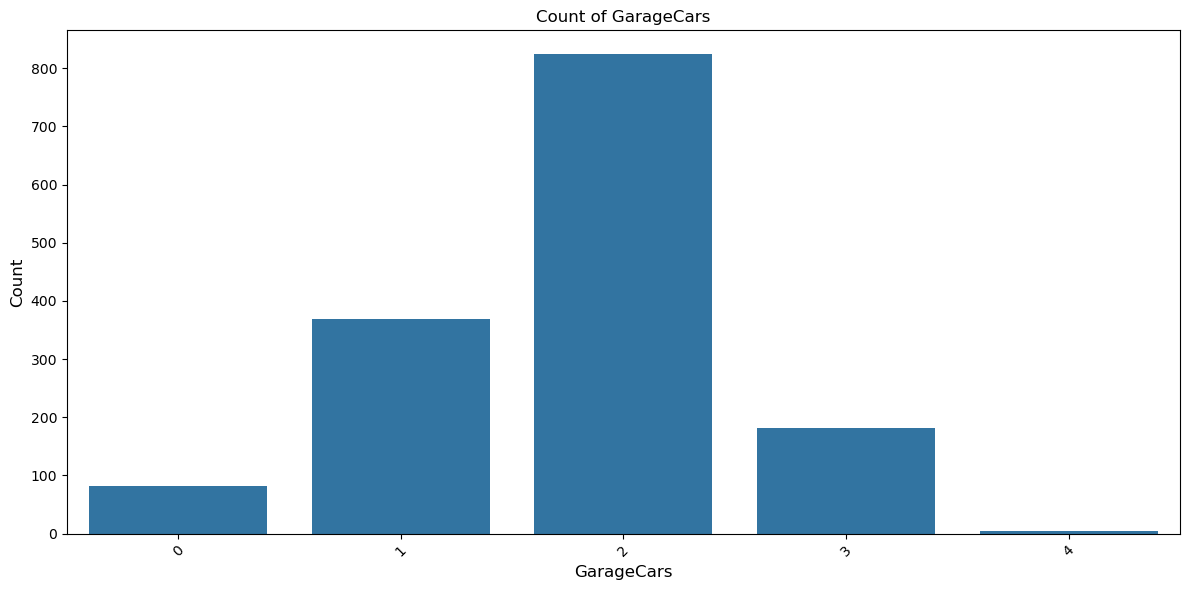

In [17]:
# Function to plot graphs for categorical data
for column in categorical_disc_columns:
    # Define the color palette with the desired colors
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data)  
    plt.title(f'Count of {column}')  
    plt.xlabel(column, fontsize=12) 
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, fontsize=10) 
    plt.yticks(fontsize=10)  
    plt.tight_layout()  
    plt.show()

## Data preprocessing

We tried to remove the features that showed the lowest values according to feature_importances_, but this did not lead to an improvement in the model's performance.

Now let's try to remove unrepresentative features with a small amount of data.

In [18]:
# if we remove only the 6 features with small amount of data.
data = data.drop(columns=['Alley','MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

Attempts were also made to remove outliers, but they did not improve the performance of the final mode

### Correlation analysis

Now, examine the relationships between the features in the dataset data.

In [19]:
# Specify the list of continuous features
interval_cols = ['MSSubClass', 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

In [20]:
# Construct a correlation matrix, including categorical features, using phik_matrix()
data.phik_matrix(interval_cols=interval_cols) 

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.406769     0.444429  0.000000  0.137679   
MSZoning         0.406769  1.000000     0.293982  0.000000  0.204232   
LotFrontage      0.444429  0.293982     1.000000  0.411916  0.106285   
LotArea          0.000000  0.000000     0.411916  1.000000  0.271834   
Street           0.137679  0.204232     0.106285  0.271834  1.000000   
LotShape         0.300205  0.185537     0.414648  0.374996  0.051079   
LandContour      0.185140  0.124919     0.175330  0.362301  0.171794   
Utilities        0.000000  0.000000          NaN  0.000000  0.000000   
LotConfig        0.102203  0.169312     0.254431  0.123227  0.000000   
LandSlope        0.000000  0.095908     0.181486  0.560529  0.106504   
Neighborhood     0.758153  0.909032     0.512605  0.362646  0.231680   
Condition1       0.207957  0.123898     0.273489  0.000000  0.165516   
Condition2       0.297979  0.096335     0.129845  0.000000  0.000000   
BldgType         0.912217  0.464485     0.455198  0.056833  0.092018   
HouseStyle       0.939923  0.293768     0.083093  0.000000  0.025933   
OverallQual      0.389249  0.426471     0.267729  0.039926  0.094985   
OverallCond      0.294822  0.273066     0.063554  0.000000  0.068360   
YearBuilt        0.551683  0.605897     0.210505  0.067546  0.003625   
YearRemodAdd     0.462256  0.438500     0.167439  0.099735  0.150893   
RoofStyle        0.208157  0.108028     0.238331  0.187088  0.000000   
RoofMatl         0.115395  0.000000     0.693939  0.436975  0.000000   
Exterior1st      0.409665  0.394204     0.245396  0.057393  0.000000   
Exterior2nd      0.526156  0.350532     0.275117  0.154599  0.000000   
MasVnrArea       0.139409  0.151025     0.289046  0.173100  0.000000   
ExterQual        0.503378  0.289167     0.199371  0.000000  0.475318   
ExterCond        0.186983  0.208345     0.000000  0.000000  0.000000   
Foundation       0.441144  0.320777     0.192560  0.000000  0.061522   
BsmtQual         0.541785  0.232528     0.181143  0.000000  0.000000   
BsmtCond         0.152320  0.113791     0.000000  0.000000  0.000000   
BsmtExposure     0.427083  0.092436     0.167012  0.209226  0.135961   
BsmtFinType1     0.316925  0.199134     0.087730  0.021373  0.000000   
BsmtFinSF1       0.197201  0.134881     0.504822  0.320585  0.026466   
BsmtFinType2     0.098310  0.057665     0.046683  0.112306  0.148742   
BsmtFinSF2       0.066519  0.000000     0.101090  0.250043  0.048765   
BsmtUnfSF        0.317075  0.171329     0.136078  0.000000  0.000000   
TotalBsmtSF      0.355274  0.184997     0.710507  0.412633  0.000000   
Heating          0.187897  0.080985     0.072672  0.140554  0.000000   
HeatingQC        0.268417  0.303251     0.076946  0.000000  0.014413   
CentralAir       0.338673  0.243021     0.048390  0.000000  0.063493   
Electrical       0.192320  0.268821     0.000000  0.000000  0.000000   
1stFlrSF         0.566848  0.257510     0.553987  0.303703  0.000000   
2ndFlrSF         0.694304  0.363880     0.316013  0.135596  0.000000   
LowQualFinSF     0.233934  0.246529     0.147720  0.000000  0.000000   
GrLivArea        0.410201  0.249331     0.592048  0.376232  0.000000   
BsmtFullBath     0.441134  0.086795     0.224060  0.301055  0.137785   
BsmtHalfBath     0.136353  0.026863     0.000000  0.000000  0.000000   
FullBath         0.513229  0.212434     0.195341  0.142152  0.032899   
HalfBath         0.639431  0.183492     0.049714  0.000000  0.000000   
BedroomAbvGr     0.680072  0.264925     0.244891  0.103901  0.000000   
KitchenAbvGr     0.809405  0.111410     0.028492  0.000000  0.000000   
KitchenQual      0.473359  0.212145     0.154705  0.000000  0.093207   
TotRmsAbvGrd     0.533735  0.306202     0.353944  0.146785  0.000000   
Functional       0.155041  0.000000     0.000000  0.039102  0.000000   
Fireplaces       0.410033  0.165870     0.353484  0.230177  0.089690   
GarageType       0.446082  0.306276     0.202780  0.083

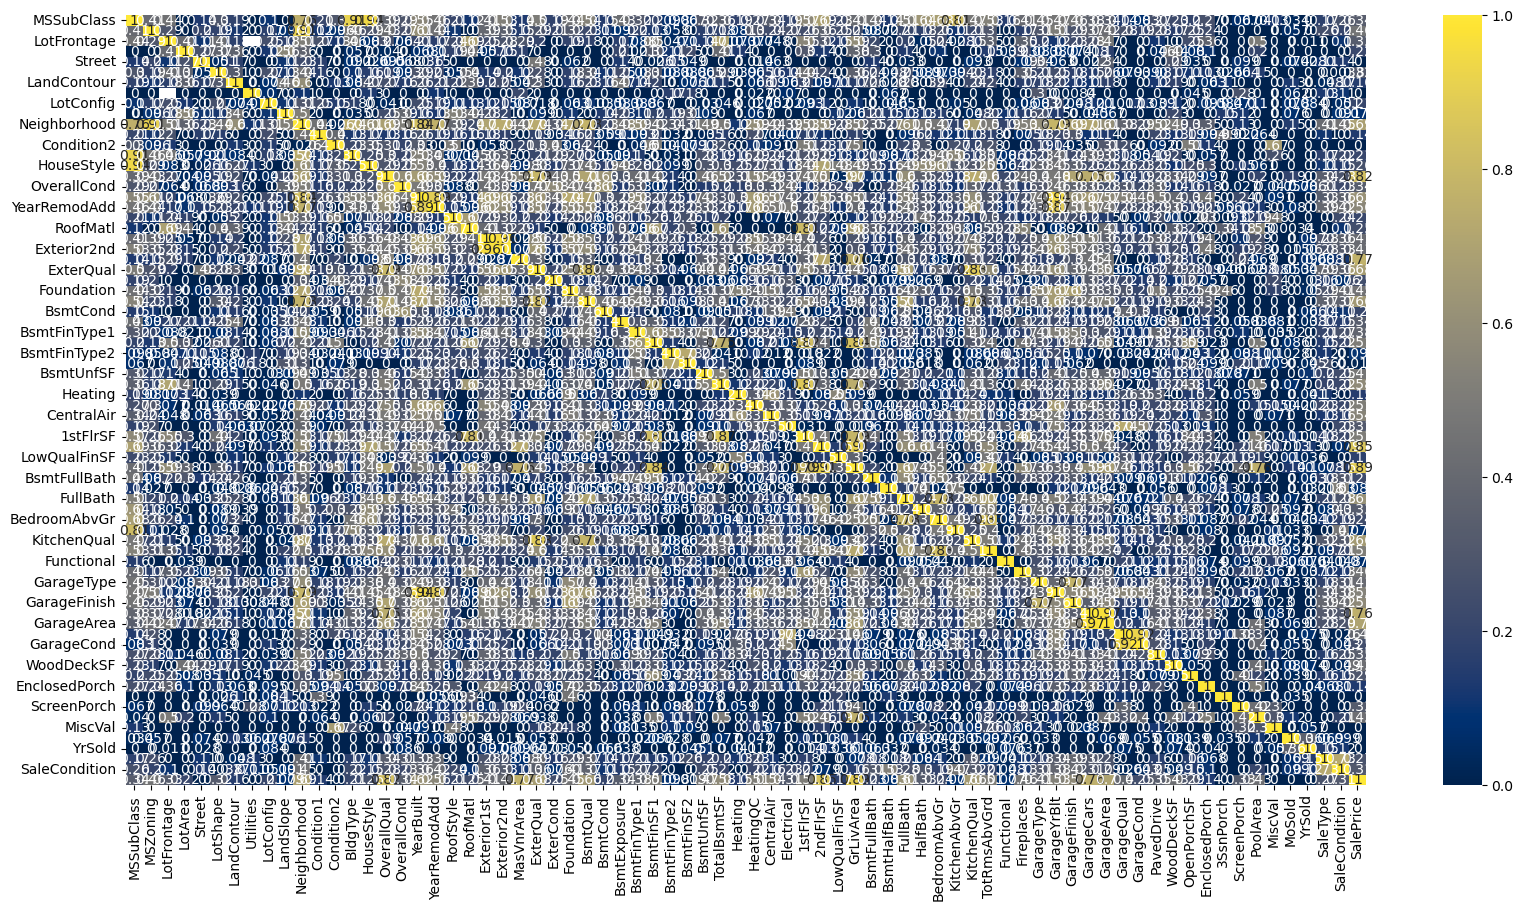

In [21]:
#Visualize the resulting correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(data.phik_matrix(interval_cols=interval_cols), annot=True, cmap='cividis');

In [22]:
# Select correlation with the target variable
# Calculate the Phik matrix
phik_corr_matrix = data.phik_matrix(interval_cols=interval_cols)

sale_price_corr = phik_corr_matrix['SalePrice']

# Sort by descending importance
sorted_features = sale_price_corr.sort_values(ascending=False)

In [23]:
sorted_features 

SalePrice        1.000000
GrLivArea        0.887394
2ndFlrSF         0.854432
OverallQual      0.820627
MasVnrArea       0.770491
GarageCars       0.760717
GarageArea       0.701435
Neighborhood     0.687896
ExterQual        0.675875
KitchenQual      0.661993
BsmtQual         0.655659
YearBuilt        0.620741
FullBath         0.613885
TotalBsmtSF      0.576227
GarageFinish     0.570523
YearRemodAdd     0.562218
CentralAir       0.543913
GarageYrBlt      0.534028
HeatingQC        0.514985
TotRmsAbvGrd     0.514888
1stFlrSF         0.511577
BsmtFinSF1       0.511198
BsmtUnfSF        0.470730
MSZoning         0.457405
Fireplaces       0.456464
Foundation       0.452488
PoolArea         0.434811
WoodDeckSF       0.434198
Exterior2nd      0.413595
Exterior1st      0.408708
GarageType       0.406528
GarageQual       0.396982
BsmtFinType1     0.375009
PavedDrive       0.347188
MSSubClass       0.342978
OverallCond      0.336568
BsmtExposure     0.335231
LotFrontage      0.330819
HalfBath    

The correlation of various features with the target variable "SalePrice" reveals several highly influential variables. The feature with the highest correlation is "GrLivArea" (0.887), followed by "2ndFlrSF" (0.854) and "OverallQual" (0.821). Other significant features include "MasVnrArea" (0.770), "GarageCars" (0.761), "GarageArea" (0.701), and "Neighborhood" (0.688), all showing strong positive correlations with SalePrice.
Further down, we find features like "ExterQual" (0.676), "KitchenQual" (0.662), and "BsmtQual" (0.656) also contributing significantly to predicting SalePrice. On the other hand, variables like "MoSold", "YrSold", "Condition2", "MiscVal", "3SsnPorch", "Street", and "Utilities" show zero or very weak correlations with SalePrice, indicating they have little to no predictive power in this case.
This suggests that while certain features (such as living area size, floor space, and overall quality) are strong indicators of house sale price, others, like the month or year of sale, have minimal influence. These insights could guide feature selection in predictive modeling to optimize the performance of machine learning models.

## Building models

In [24]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
# split our data into training and valid sets.
X_train, X_val, y_train, y_val = train_test_split(
    data.drop(['SalePrice'], axis=1),
    data['SalePrice'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE)
X_train.shape, X_val.shape

((1095, 73), (365, 73))

In [25]:
# converting our object type data to category type
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [27]:
# get the column names with 'category' dtype
cat_columns = data.select_dtypes(include='category').columns.tolist()

In [28]:
num_columns = X_train.select_dtypes(['int64', 'float64']).columns.tolist()

In [29]:
#data transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 
         Pipeline([
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
         ]), num_columns),
        
        ('cat', 
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
         ]), cat_columns)
    ])

#list of models with parameters for tuning
models = {
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=0),
        'params': {
            'model__iterations': [500, 1000],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__depth': [6, 8, 10],
            'model__l2_leaf_reg': [3, 5, 10],
            'model__border_count': [32, 64, 128],
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 500],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 500],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__max_depth': [3, 5, 7],
            'model__subsample': [0.8, 1.0],
        }
    }
}

best_models = {}

#hyperparameter tuning for each model
for name, config in models.items():
    print(f'Training {name}...')
    
    # Creating the pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])
    
    #randomizedSearchCV
    random_search = RandomizedSearchCV(
        pipe,
        param_distributions=config['params'],
        n_iter=10,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    
    #training
    random_search.fit(X_train, y_train)
    
    #saving the best model
    best_models[name] = {
        'best_estimator': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }

    print(f'Best Parameters for {name}: {random_search.best_params_}')
    print(f'Best Score for {name}: {random_search.best_score_}\n')

Training CatBoost...
Best Parameters for CatBoost: {'model__learning_rate': 0.05, 'model__l2_leaf_reg': 3, 'model__iterations': 500, 'model__depth': 6, 'model__border_count': 64}
Best Score for CatBoost: -27163.794989370053

Training RandomForest...
Best Parameters for RandomForest: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': None}
Best Score for RandomForest: -29974.985761604297

Training GradientBoosting...
Best Parameters for GradientBoosting: {'model__subsample': 0.8, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1}
Best Score for GradientBoosting: -27222.14525831418



In [30]:
#predictions on the valid set
y_val_pred = random_search.best_estimator_.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 25449.2205


C:\Users\m.novoselova\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [9, 13, 27] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [31]:
#residuals calculation
residuals = y_val - y_val_pred

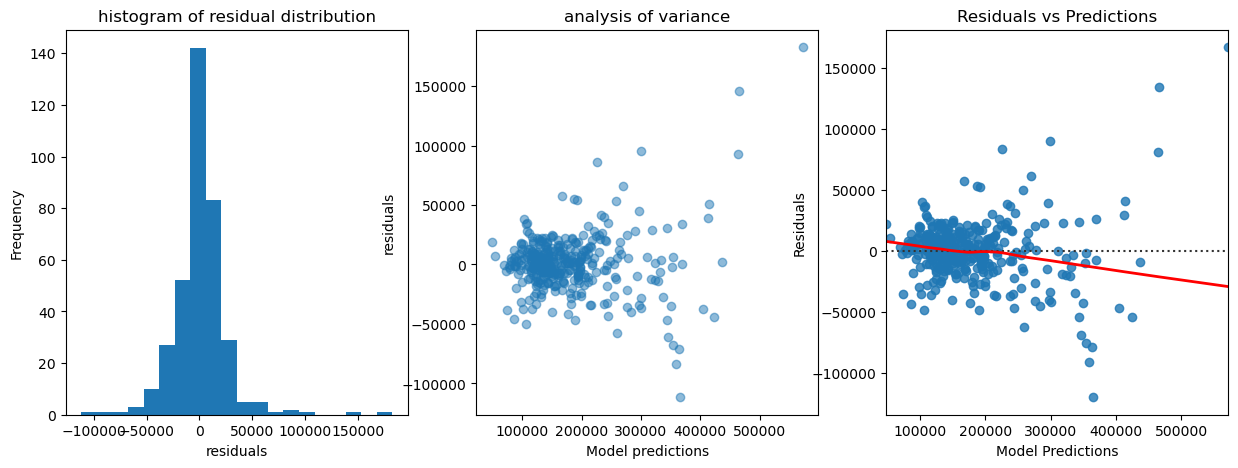

In [32]:
# Plot graphs for numerical features - histogram of frequency distribution and scatter plot
fig, axes = plt.subplots(nrows = 1, ncols= 3, figsize = (15, 5))

axes[0].hist(residuals, bins = 20)
axes[0].set_title('histogram of residual distribution')
axes[0].set_xlabel('residuals')
axes[0].set_ylabel('Frequency')

axes[1].scatter(y_val_pred, residuals, alpha = 0.5)
axes[1].set_xlabel('Model predictions')
axes[1].set_ylabel('residuals')
axes[1].set_title('analysis of variance')

# sns.residplot for assessment of residual distributions
sns.residplot(x=y_val_pred, y=residuals, lowess=True, ax=axes[2], line_kws={'color': 'red', 'lw': 2})
axes[2].set_title('Residuals vs Predictions')
axes[2].set_xlabel('Model Predictions')
axes[2].set_ylabel('Residuals')

plt.show()

If we look at the residuals distribution plot (the one on the left), we can see that it is slightly skewed to the left relative to 0.
If we look at the scatter plot (the second one on the right) of residuals versus predicted values, we can see that the line generated using lowess is almost straight but with a slight curve. This indicates that, overall, the residuals are normally distributed, but there may be minor deviations depending on the predicted values. The slight curvature of the line may suggest potential non-linear relationships that the model is not fully capturing. In this case, the model might slightly underestimate or overestimate values in certain ranges of predictions.

My further attempts to improve these metrics led to a better distribution of the residuals, but ultimately resulted in a worse target metric.

In [33]:
# Get the best model
best_model = best_models[max(best_models, key=lambda x: best_models[x]['best_score'])]['best_estimator'].named_steps['model']

# Get the actual feature names after transformation
X_train_transformed = preprocessor.fit_transform(X_train)

# Numerical features (they remain the same)
num_feature_names = num_columns

# Categorical features after OneHotEncoding
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = onehot_encoder.get_feature_names_out(cat_columns)

# Combine all features
feature_names = list(num_feature_names) + list(cat_feature_names)

# Display feature importance if the model supports it
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    feature_importance_list = list(zip(feature_names, feature_importances))
    feature_importance_list.sort(key=lambda x: x[1], reverse=True)  # Sort by importance

    # Print the list of features and their importance
    for feature, importance in feature_importance_list:
        print(f"{feature}: {importance:.5f}")

OverallQual: 23.07843
GrLivArea: 12.94055
BsmtFinSF1: 5.26527
1stFlrSF: 4.95073
TotalBsmtSF: 4.51287
LotArea: 3.88771
GarageCars: 3.03725
Fireplaces: 2.98305
YearBuilt: 2.92259
GarageArea: 2.40959
2ndFlrSF: 1.86434
OpenPorchSF: 1.68331
FullBath: 1.62001
OverallCond: 1.53691
GarageFinish_Unf: 1.46932
YearRemodAdd: 1.44837
TotRmsAbvGrd: 1.43563
KitchenQual_Gd: 1.36233
ExterQual_TA: 1.28033
GarageYrBlt: 1.25766
HalfBath: 0.98980
BsmtQual_TA: 0.93742
BsmtQual_Gd: 0.87256
SaleType_New: 0.75558
Neighborhood_Edwards: 0.74874
ExterQual_Gd: 0.73282
Foundation_PConc: 0.71352
LotFrontage: 0.62411
WoodDeckSF: 0.62012
BedroomAbvGr: 0.61516
MoSold: 0.53639
Condition1_Norm: 0.53342
BsmtUnfSF: 0.50999
BsmtExposure_Gd: 0.49485
CentralAir_Y: 0.42241
Neighborhood_Crawfor: 0.39102
ScreenPorch: 0.37027
MSSubClass: 0.36526
MasVnrArea: 0.35496
LandContour_Lvl: 0.33543
BsmtFullBath: 0.33348
BsmtExposure_No: 0.31765
Exterior2nd_VinylSd: 0.27141
LotConfig_CulDSac: 0.26263
BsmtFinType1_Unf: 0.25717
KitchenQual_T

The most significant feature in the model is OverallQual (23.07), followed by GrLivArea (12.94), which also has a substantial impact. Next are BsmtFinSF1 (5.26), 1stFlrSF (4.95), and TotalBsmtSF (4.51), highlighting the importance of living and basement areas. Other notable contributors to the model include LotArea (3.8), GarageCars (3.03), and Fireplaces (2.98305), reflecting the influence of lot size, garage capacity, and the presence of fireplaces.
The year of construction YearBuilt (2.92) and garage area GarageArea (2.41) also play a significant role. The second floor 2ndFlrSF (1.86), open porch area OpenPorchSF (1.68), and the number of full bathrooms FullBath (1.62) contribute moderately.
Among categorical features, GarageFinish_Unf (1.47), KitchenQual_Gd (1.36233), and ExterQual_TA (1.28) are the most impactful, indicating the influence of garage finishing, kitchen quality, and exterior condition. Some features, such as Neighborhood_Edwards (0.74) and SaleType_New (0.75), suggest that location and sale type also play a role.
Features related to foundation condition, such as Foundation_PConc (0.71352), as well as factors like LotFrontage (0.62411) and the presence of a wooden deck WoodDeckSF (0.62), have a small but noticeable influence.
At the bottom of the list are features with little to no impact on model predictions, such as Neighborhood_BrDale, Condition1_RRAn, Exterior2nd_Brk Cmn, GarageQual_Fa, and others, with values close to zero. These features do not significantly affect the model’s output.

# Prediction on test data

In [34]:
#reset index
test = test.reset_index()

In [35]:
# display first 5 rows
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [36]:
# save 'Id' column from test dataset
test_id = test['Id']

In [37]:
# remove 6 features, which we removed in 'data' set 
test = test.drop(columns=['Id', 'Alley','MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [38]:
# converting our object type data to category type
for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].astype('category')

In [39]:

test_pred = random_search.predict(test)

# Create the submission file
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': test_pred
})

# Save the submission file
submission.to_csv('submission_file.csv', index=False)
print("Submission file saved as 'submission_catboost_tuned.csv'.")

Submission file saved as 'submission_catboost_tuned.csv'.


C:\Users\m.novoselova\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Conclusion

The project was aimed at predicting house prices using advanced regression techniques. The goal was to analyze various factors influencing property values and develop machine learning models to make accurate predictions.
During the analysis, it was established that many variables, such as LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, GarageArea, and SalePrice, exhibited right-skewed distributions, suggesting the need for log transformation before modeling. Features like OverallQual, OverallCond, Fireplaces, KitchenAbvGr, and GarageCars were identified as categorical and processed using One-Hot Encoding. Year-based features (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold) showed an increasing trend in new houses over time, aligning with real estate market dynamics. Additionally, variables such as FullBath, HalfBath, and TotRmsAbvGrd revealed standard housing layouts based on their modal values.
To predict house prices, multiple machine learning models were employed, including CatBoost, RandomForest, and GradientBoosting. The preprocessing pipeline included missing value imputation, scaling for numerical features, and encoding for categorical variables. Hyperparameter tuning was conducted using RandomizedSearchCV to optimize model performance.
As a result, the best-performing model was CatBoost with the following parameters: learning_rate = 0.05, l2_leaf_reg = 3, iterations = 500, depth = 6, and border_count = 64. This model achieved the best score of -27163.79 in terms of negative root mean squared error. Other models, including RandomForest and GradientBoosting, also performed well but had slightly higher error values. The RMSE (Root Mean Squared Error) of the best model on the test set was 25,449.22.
Feature importance analysis revealed that the most significant factor in the model was OverallQual (23.07), followed by GrLivArea (12.94), BsmtFinSF1 (5.26), 1stFlrSF (4.95), and TotalBsmtSF (4.51). Other influential features included LotArea, GarageCars, Fireplaces, YearBuilt, and GarageArea. Some categorical features, such as KitchenQual and ExterQual, also had noticeable impacts on the model’s predictions. Meanwhile, features like MoSold, YrSold, and Street had minimal influence, indicating that temporal factors had little effect on property values.
In conclusion, the project successfully developed predictive models for house prices, with CatBoost emerging as the best model based on its predictive accuracy. The analysis provided valuable insights into the factors affecting house prices, highlighting the importance of structural quality, living area, and additional amenities in determining property value. Future improvements may include further feature engineering, handling outliers more effectively, and exploring additional modeling techniques to enhance prediction accuracy.
On the Kaggle platform, the results on the test data showed a Score : 0.13353, further confirming the effectiveness of the model.